In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !git clone https://github.com/gagan3012/llm-thought-tracing
# !git clone https://github.com/sunyiyou/SAT.git

In [ ]:
# %cd llm-thought-tracing

In [ ]:
# !pip install git+https://github.com/davidbau/baukit datasets bitsandbytes nnsight --upgrade

In [ ]:
# !git pull

In [ ]:
!uv pip install git+https://github.com/gagan3012/ltr

Using Python 3.11.13 environment at: /usr
Resolved 117 packages in 1.63s
Audited 117 packages in 0.25ms


In [ ]:
from huggingface_hub import login
from google.colab import userdata
token = userdata.get('HF_TOKEN')

login(token)

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def setup_model(model_name = "allenai/OLMo-2-0425-1B-Instruct"):
  print("Loading model and tokenizer...")
  # model_name = "allenai/OLMo-2-0425-1B-Instruct"  # A smaller Qwen model for quick loading
  tokenizer = AutoTokenizer.from_pretrained(model_name)
  model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", torch_dtype="auto")

  return model, tokenizer

model, tokenizer = setup_model()

Loading model and tokenizer...


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.97G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

In [ ]:
def generate_respnse(model, tokenizer, prompt):
    messages = [
        {"role": "user", "content": prompt}
    ]
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )
    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=512
    )
    generated_ids = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return response

Running concept extraction on model: allenai/OLMo-2-0425-1B-Instruct
Model type: olmo2
Generating concept activation heatmap...


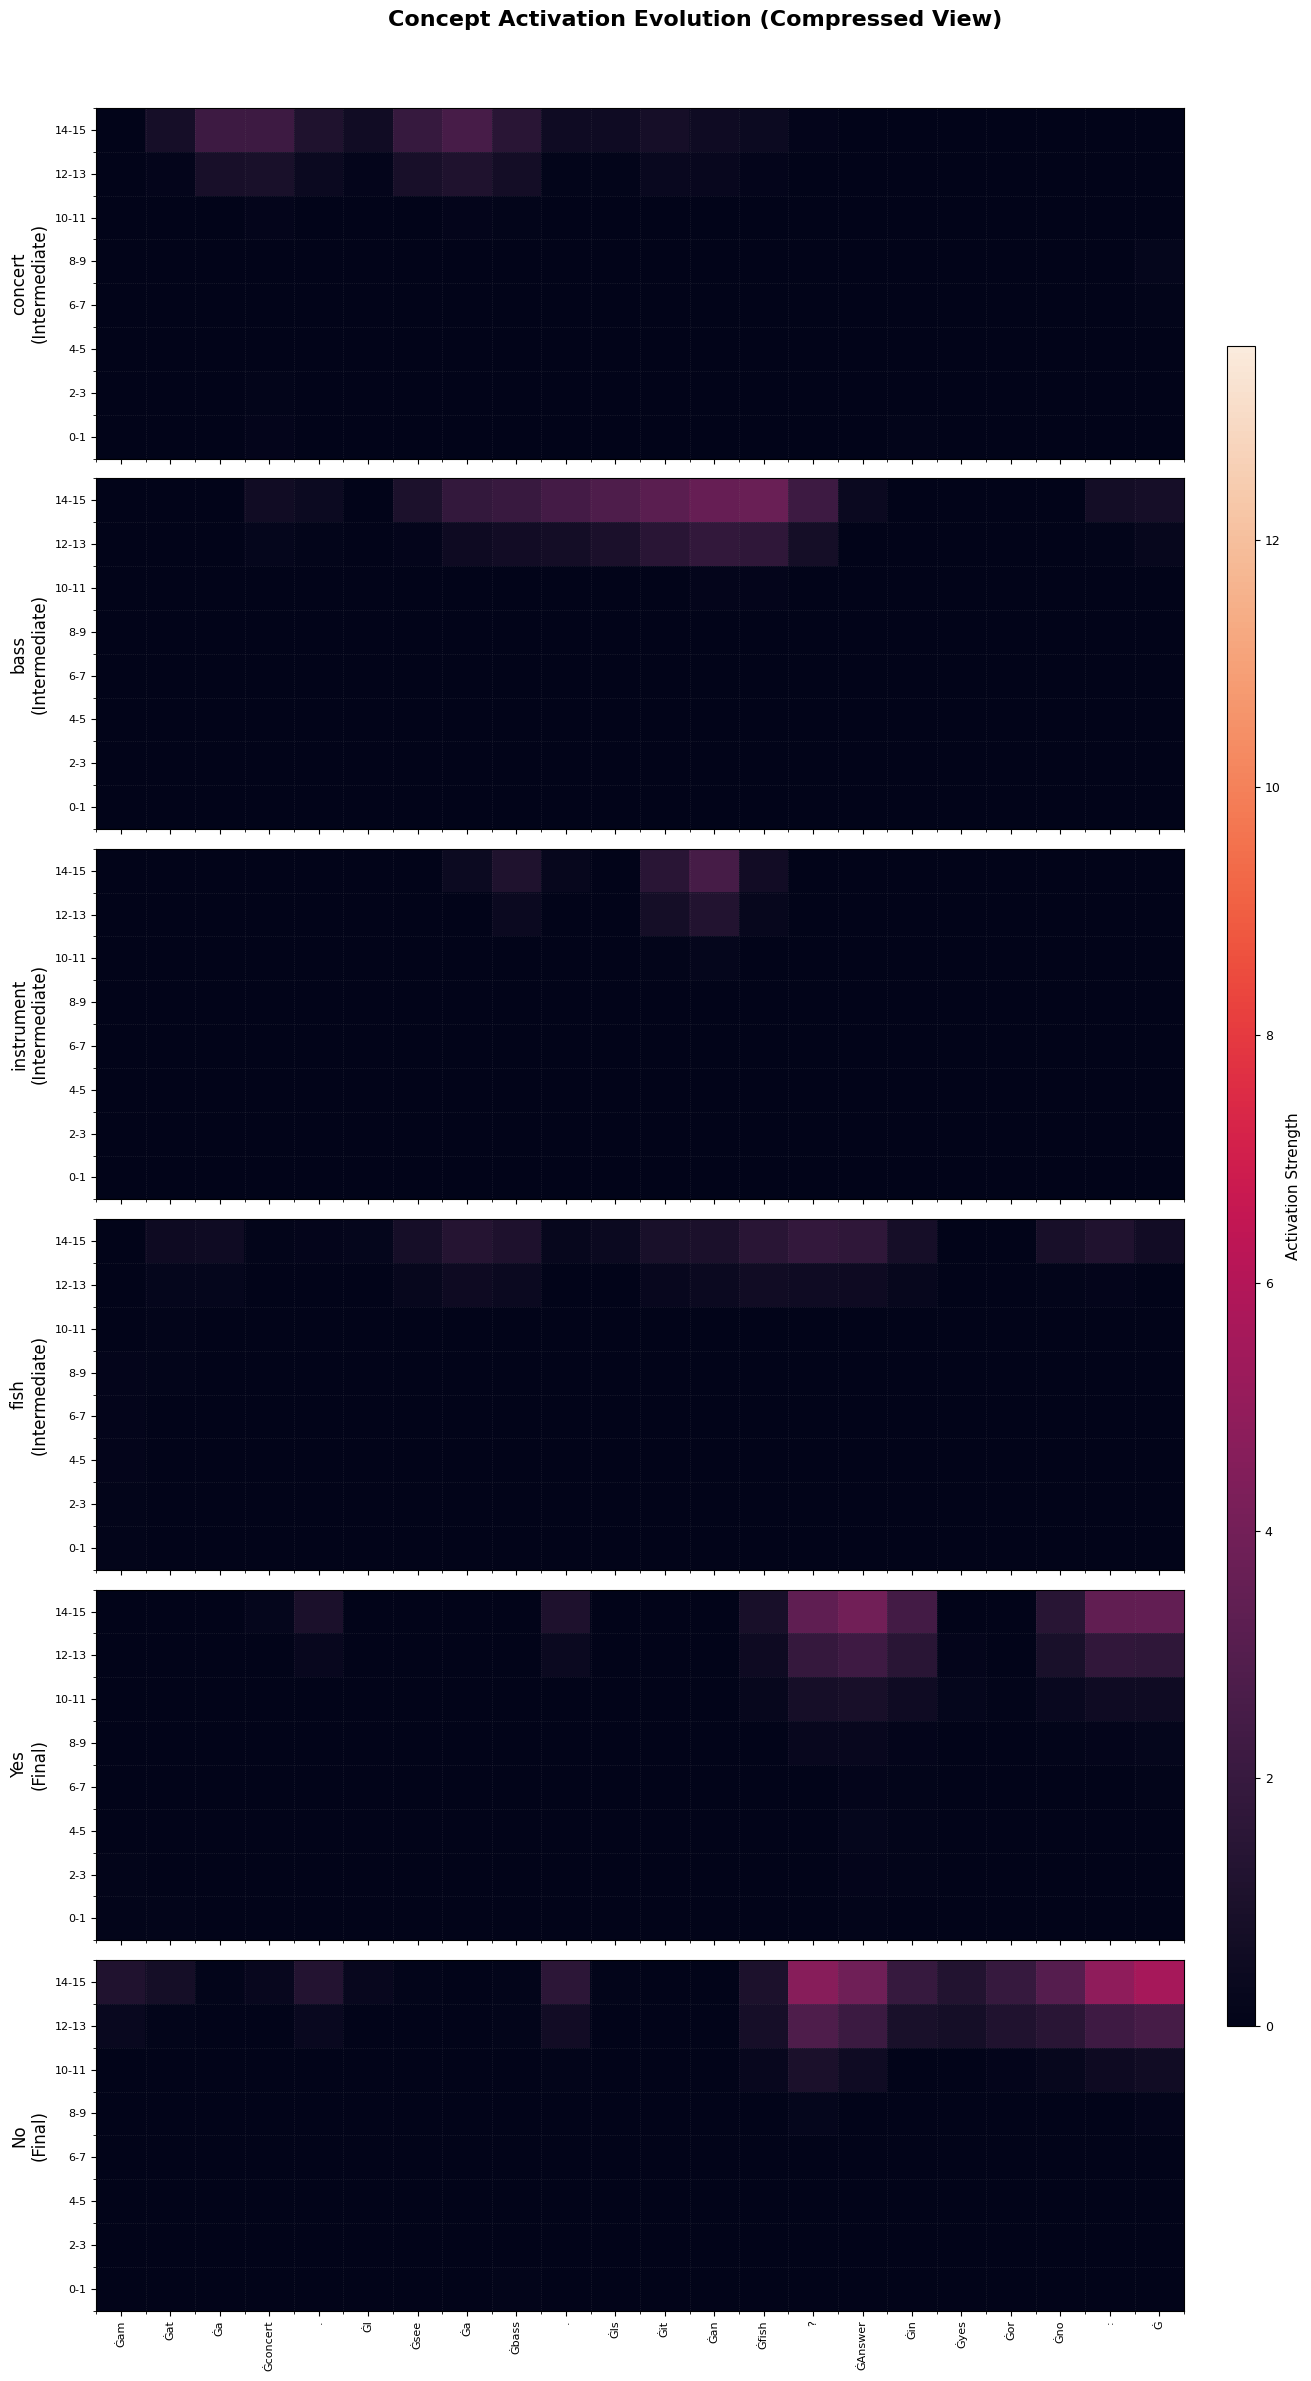

Analyzing reasoning paths...


`sdpa` attention does not support `output_attentions=True` or `head_mask`. Please set your attention to `eager` if you want any of these features.


Error analyzing attention patterns: 'NoneType' object has no attribute 'size'
[{'concept': 'concert', 'position': 7, 'peak_layer': 15, 'peak_prob': 7.53125, 'token': 'Ġa'}, {'concept': 'bass', 'position': 13, 'peak_layer': 15, 'peak_prob': 9.375, 'token': 'Ġfish'}, {'concept': 'instrument', 'position': 12, 'peak_layer': 15, 'peak_prob': 9.4375, 'token': 'Ġan'}, {'concept': 'Yes', 'position': 20, 'peak_layer': 15, 'peak_prob': 10.3125, 'token': ':'}]
Path ['concert', 'bass', 'instrument', 'Yes'] scored 2.4865079365079366 based on concept ordering (0.30), activation strength (1.00), final concept confidence (10.31)
[{'concept': 'concert', 'position': 7, 'peak_layer': 15, 'peak_prob': 7.53125, 'token': 'Ġa'}, {'concept': 'bass', 'position': 13, 'peak_layer': 15, 'peak_prob': 9.375, 'token': 'Ġfish'}, {'concept': 'instrument', 'position': 12, 'peak_layer': 15, 'peak_prob': 9.4375, 'token': 'Ġan'}, {'concept': 'No', 'position': 14, 'peak_layer': 15, 'peak_prob': 13.5625, 'token': '?'}]
Path

Model response
Prompt:  I am at a concert. I see a bass. Is it an fish? Answer in yes or no: 


Response:  No.
Results:
Best reasoning path: concert → bass → fish → No
Path score: 3.3817

Model information:
  name: allenai/OLMo-2-0425-1B-Instruct
  type: olmo2
  n_layers: 16
Running concept extraction on model: allenai/OLMo-2-0425-1B-Instruct
Model type: olmo2
Generating concept activation heatmap...


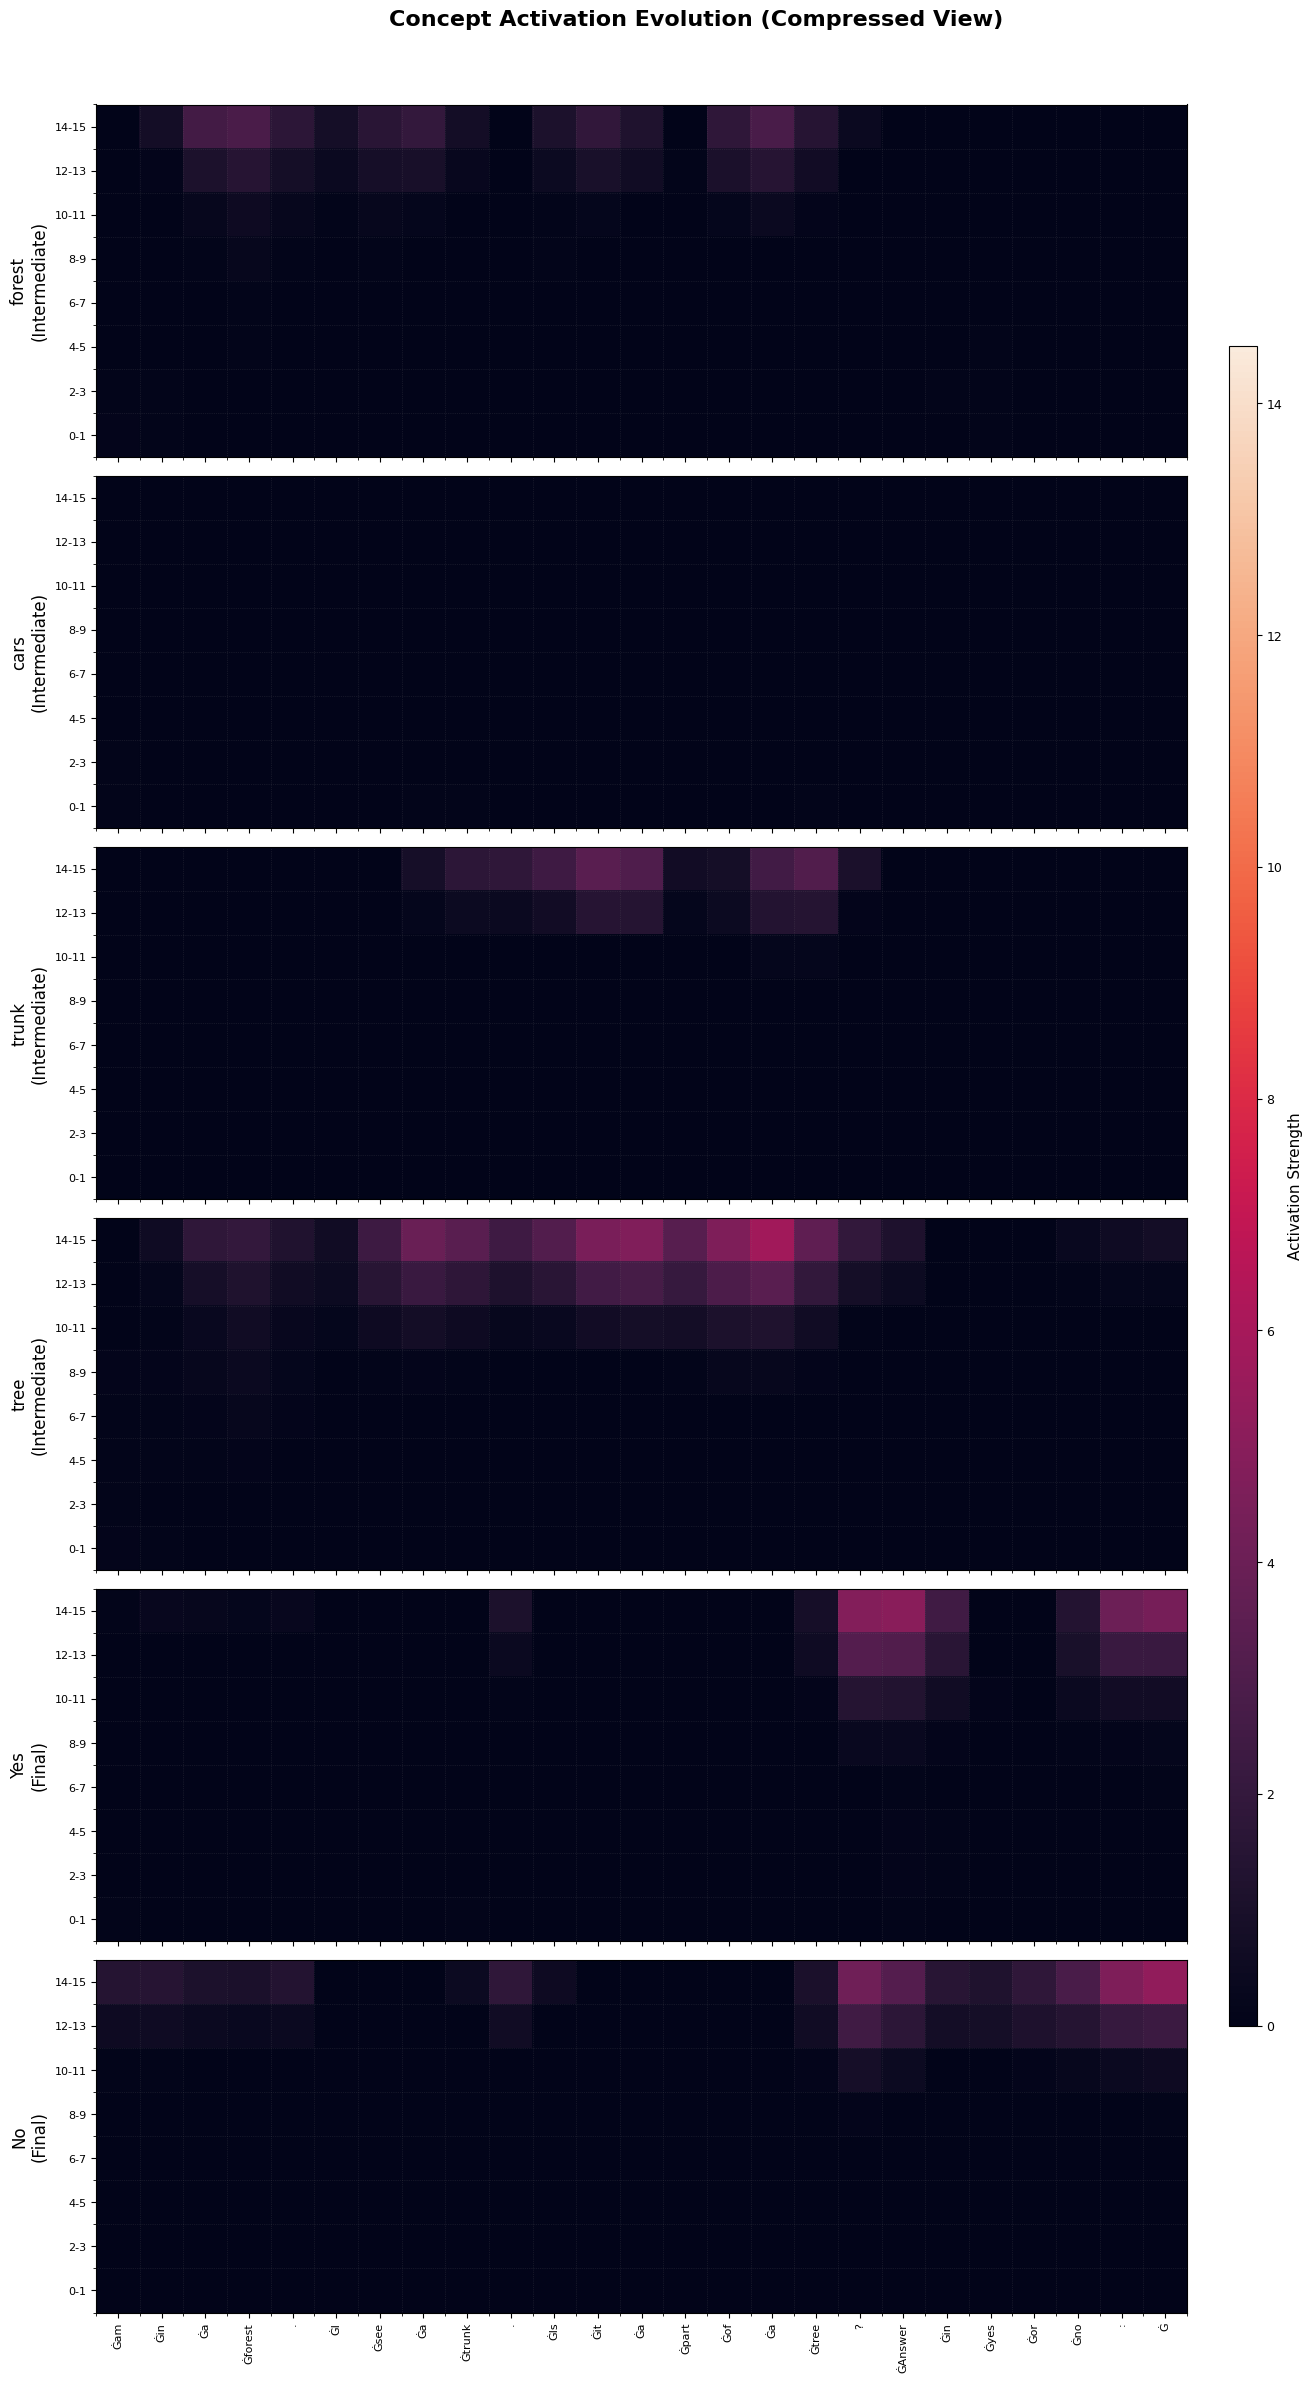

Analyzing reasoning paths...


Error analyzing attention patterns: 'NoneType' object has no attribute 'size'
[{'concept': 'forest', 'position': 2, 'peak_layer': 15, 'peak_prob': 9.1875, 'token': 'Ġa'}, {'concept': 'cars', 'position': 6, 'peak_layer': 15, 'peak_prob': 3.78125, 'token': 'Ġsee'}, {'concept': 'trunk', 'position': 16, 'peak_layer': 15, 'peak_prob': 9.6875, 'token': 'Ġtree'}, {'concept': 'Yes', 'position': 17, 'peak_layer': 15, 'peak_prob': 13.25, 'token': '?'}]
Path ['forest', 'cars', 'trunk', 'Yes'] scored 3.3095238095238093 based on concept ordering (1.00), activation strength (1.00), final concept confidence (13.25)
[{'concept': 'forest', 'position': 2, 'peak_layer': 15, 'peak_prob': 9.1875, 'token': 'Ġa'}, {'concept': 'cars', 'position': 6, 'peak_layer': 15, 'peak_prob': 3.78125, 'token': 'Ġsee'}, {'concept': 'trunk', 'position': 16, 'peak_layer': 15, 'peak_prob': 9.6875, 'token': 'Ġtree'}, {'concept': 'No', 'position': 23, 'peak_layer': 15, 'peak_prob': 13.3125, 'token': ':'}]
Path ['forest', 'cars'

Model response
Prompt:  I am in a forest. I see a trunk. Is it a part of a tree? Answer in yes or no: 
Response:  No. Trunks are the main stems of trees, while trunks are specific parts of the tree. Trunks are typically the largest and strongest parts of a tree, housing the tree's branches, leaves, and other internal structures. The trunk is the primary structural component of the tree, supporting its branches and leaves, and it is typically thicker and more robust than the branches and smaller twigs that make up the rest of the tree.
Results:
Best reasoning path: forest → cars → trunk → No
Path score: 3.3119

Model information:
  name: allenai/OLMo-2-0425-1B-Instruct
  type: olmo2
  n_layers: 16


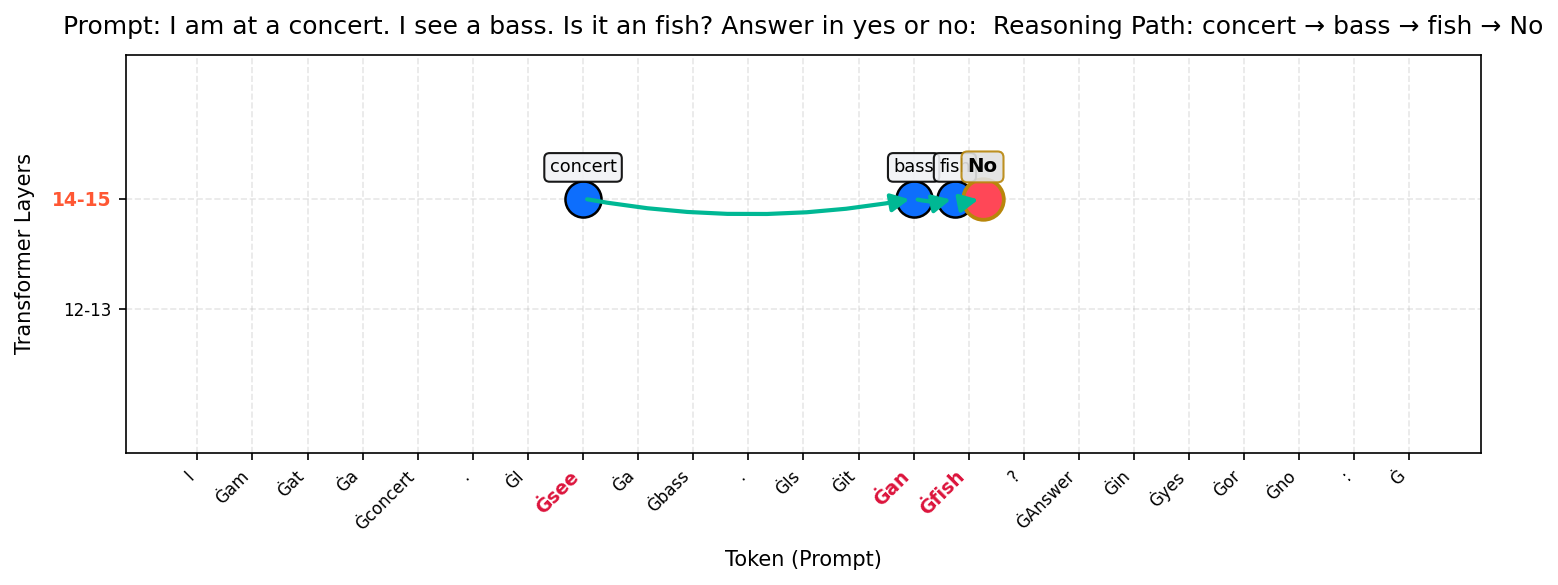

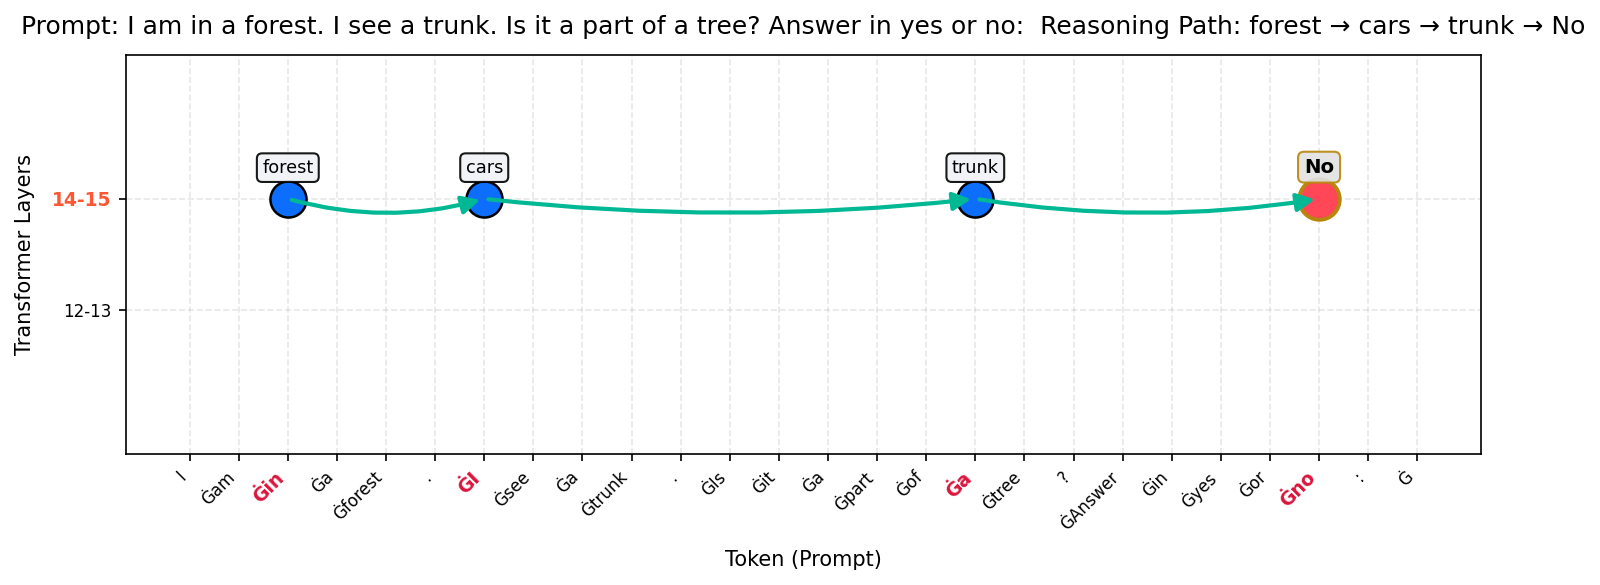

In [ ]:
import torch
from ltr.concept_extraction import extract_concept_activations
from ltr.reasoning_analysis import analyze_reasoning_paths
from ltr.visualization import plot_concept_activation_heatmap, animate_reasoning_flow
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def analyze_reasoning(model,
                            tokenizer,
                            model_name,
                            prompt,
                            intermediate_concepts,
                            final_concepts,
                            potential_paths
                            ):

    print(f"Running concept extraction on model: {model_name}")
    print(f"Model type: {model.config.model_type}")

    # Extract concept activations
    activations = extract_concept_activations(
        model=model,
        tokenizer=tokenizer,
        prompt=prompt,
        intermediate_concepts=intermediate_concepts,
        final_concepts=final_concepts
    )

    # Visualize concept activations
    print("Generating concept activation heatmap...")
    heatmap = plot_concept_activation_heatmap(activations)
    display(heatmap)

    print("Analyzing reasoning paths...")
    path_results = analyze_reasoning_paths(
        model=model,
        tokenizer=tokenizer,
        prompt=prompt,
        potential_paths=potential_paths
    )

    # Calculate number of layers (for visualization)
    n_layers = len(activations["layer_max_probs"][intermediate_concepts[0]])

    # Visualize reasoning flow
    print("Generating reasoning flow animation...")
    flow_anim = animate_reasoning_flow(
        path_results=path_results,
        tokens=activations["tokens"],
        model_layers=n_layers
    )

    # Display animation in notebook or save as GIF
    display(HTML(flow_anim.to_jshtml()))

    print("Model response")
    print("Prompt: ", prompt)
    response = generate_respnse(model, tokenizer, prompt)
    print("Response: ", response)

    # Return results for further analysis
    return {
        "activations": activations,
        "path_results": path_results,
        "model_info": {
            "name": model_name,
            "type": model.config.model_type,
            "n_layers": n_layers
        }
    }

if __name__ == "__main__":
    model_name = "allenai/OLMo-2-0425-1B-Instruct"
    # Define prompt and concepts for geographical reasoning
    prompt = "I am at a concert. I see a bass. Is it an fish? Answer in yes or no: "
    potential_paths = [
        ["concert", "bass", "instrument", "Yes"],
        ["concert", "bass", "instrument", "No"],
        ["concert", "bass", "No"],
        ["concert", "bass", "Yes"],
        ["concert", "instrument", "No"],
        ["concert", "instrument", "Yes"],
        ["concert", "bass", "fish", "No"],
        ["concert", "bass", "fish", "Yes"],
        ["concert", "fish", "No"],
        ["concert", "fish", "Yes"],
    ]
    intermediate_concepts = ["concert", "bass", "instrument", "fish"]
    final_concepts = ["Yes", "No"]

    results = analyze_reasoning(model, tokenizer, model_name,
                                      prompt, intermediate_concepts, final_concepts, potential_paths)

    # Print results
    print("Results:")
    print(f"Best reasoning path: {' → '.join(results['path_results']['best_path'])}")
    print(f"Path score: {results['path_results']['best_path_score']:.4f}")

    # Print model information
    print("\nModel information:")
    for key, value in results["model_info"].items():
        print(f"  {key}: {value}")

    model_name = "allenai/OLMo-2-0425-1B-Instruct"
    # Define prompt and concepts for geographical reasoning
    prompt = "I am in a forest. I see a trunk. Is it a part of a tree? Answer in yes or no: "
    potential_paths = [
        ["forest", "cars", "trunk", "Yes"],
        ["forest", "cars", "trunk", "No"],
        ["forest", "cars", "No"],
        ["forest", "cars", "Yes"],
        ["forest", "trunk", "No"],
        ["forest", "trunk", "Yes"],
        ["forest", "cars", "tree", "No"],
        ["forest", "cars", "tree", "Yes"],
        ["forest", "tree", "No"],
        ["forest", "tree", "Yes"],
        ["forest", "cars","trunk", "tree", "No"],
        ["forest", "cars","trunk", "tree", "Yes"]
    ]

    intermediate_concepts = ["forest", "cars", "trunk", "tree"]
    final_concepts = ["Yes", "No"]

    results = analyze_reasoning(model, tokenizer, model_name,
                                      prompt, intermediate_concepts, final_concepts, potential_paths)

    # Print results
    print("Results:")
    print(f"Best reasoning path: {' → '.join(results['path_results']['best_path'])}")
    print(f"Path score: {results['path_results']['best_path_score']:.4f}")

    # Print model information
    print("\nModel information:")
    for key, value in results["model_info"].items():
        print(f"  {key}: {value}")

Running single prompt logit lens example...
Target layers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Performing logit lens analysis for prompt: I am at a concert. I see a bass. Is it an fish? Answer in yes or no:
Model response
Prompt:  I am at a concert. I see a bass. Is it an fish? Answer in yes or no:
Response:  No.

Logit lens analysis results:
Prompt: I am at a concert. I see a bass. Is it an fish? Answer in yes or no:
Tokens: ['I', 'Ġam', 'Ġat', 'Ġa', 'Ġconcert', '.', 'ĠI', 'Ġsee', 'Ġa', 'Ġbass', '.', 'ĠIs', 'Ġit', 'Ġan', 'Ġfish', '?', 'ĠAnswer', 'Ġin', 'Ġyes', 'Ġor', 'Ġno', ':']

Analyzing position 21
Token at position: ':'

Creating logit lens heatmap visualization...
Saved logit lens heatmap to 'logit_lens_heatmap.png'


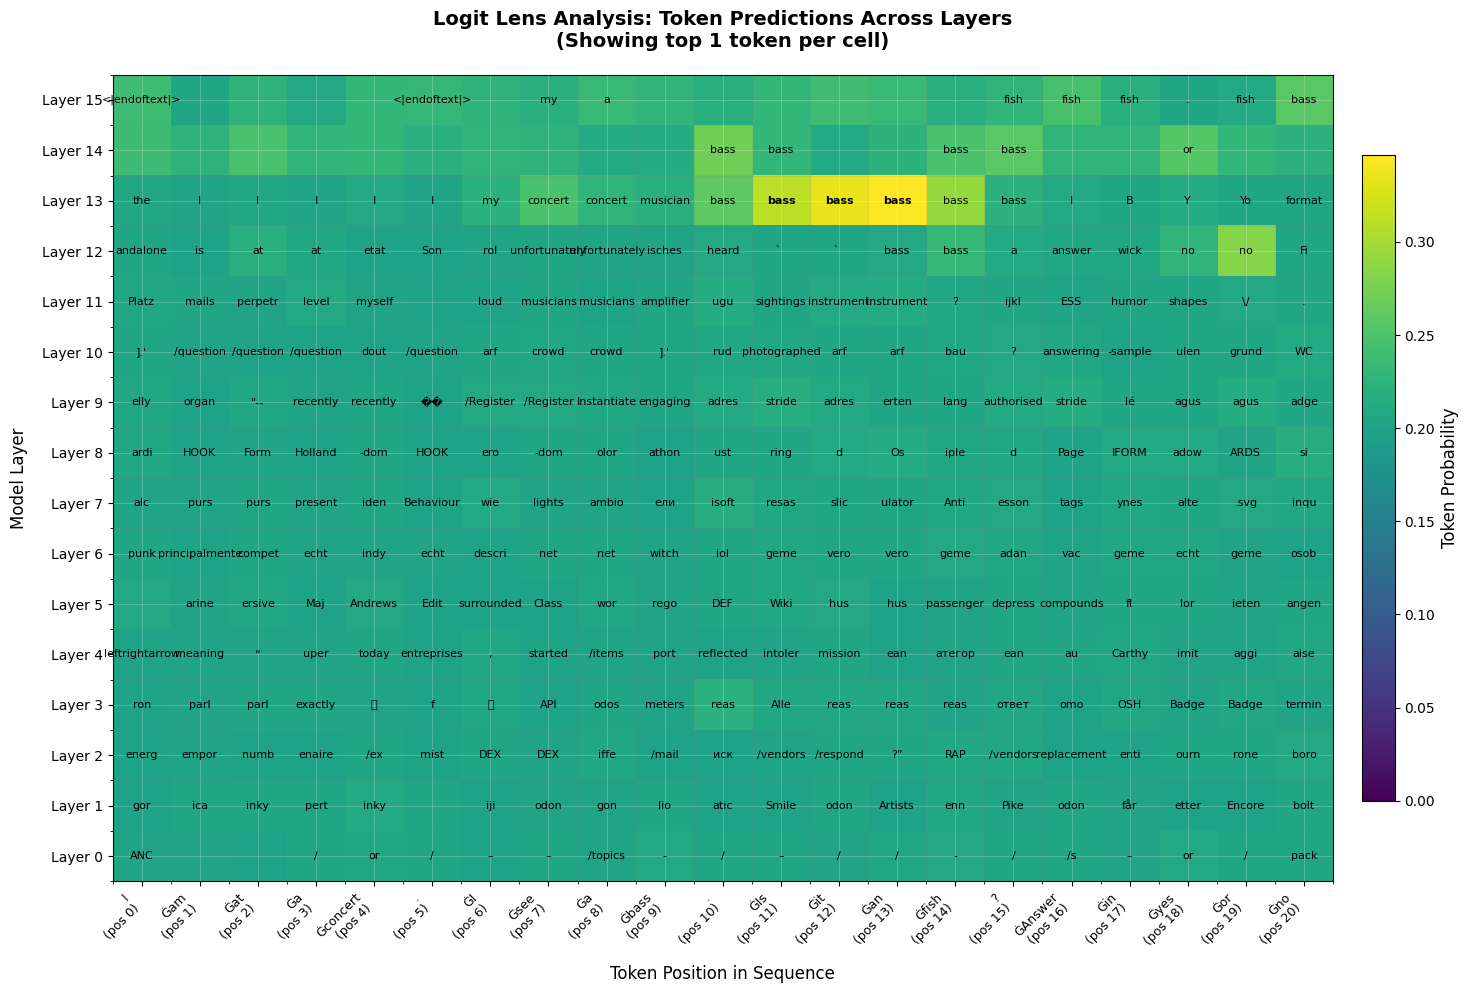


Tracing token evolution through layers...
Creating token evolution curves...
Saved token evolution curves to 'token_evolution_curves.png'


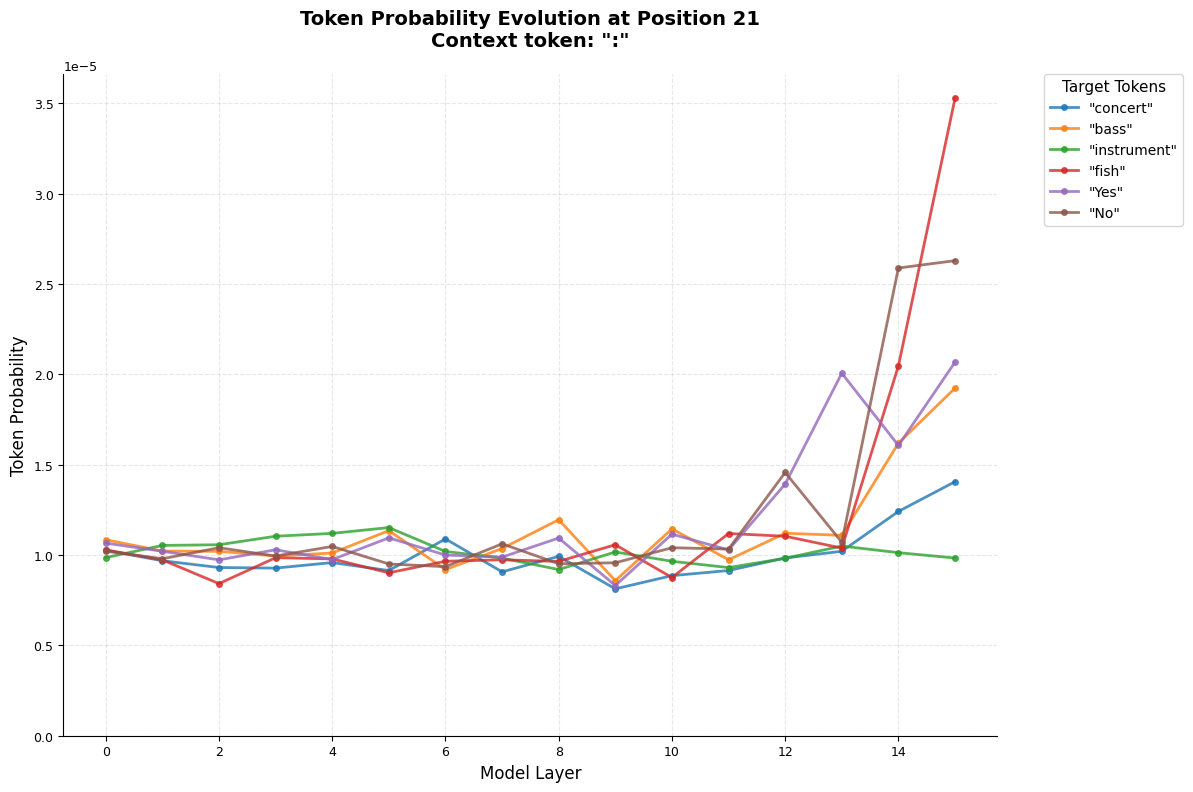


DETAILED ANALYSIS

Layer 0 Analysis:
----------------------------------------
Position 21 (token: 'I'):
Top predictions:
  1. 'ANC': 0.2029 (20.3%)
  2. '’S': 0.2010 (20.1%)
  3. 'enough': 0.1988 (19.9%)
  4. 'usa': 0.1986 (19.9%)
  5. 'det': 0.1986 (19.9%)

Layer 8 Analysis:
----------------------------------------
Position 21 (token: 'I'):
Top predictions:
  1. 'ardi': 0.2070 (20.7%)
  2. 'uru': 0.2026 (20.3%)
  3. 'ran': 0.1987 (19.9%)
  4. 'able': 0.1968 (19.7%)
  5. 'Bliss': 0.1949 (19.5%)

Layer 15 Analysis:
----------------------------------------
Position 21 (token: 'I'):
Top predictions:
  1. '<|endoftext|>': 0.2387 (23.9%)
  2. 'buscar': 0.2107 (21.1%)
  3. 'Archivo': 0.2042 (20.4%)
  4. 'aforementioned': 0.1818 (18.2%)
  5. 'Perfil': 0.1646 (16.5%)

PREDICTION CONFIDENCE ANALYSIS

Token 'concert':
  Peak probability: 0.0000 at layer 15
  First layer prob: 0.0000
  Last layer prob: 0.0000
  Overall trend: increasing

Token 'bass':
  Peak probability: 0.0000 at layer 15
  Fir

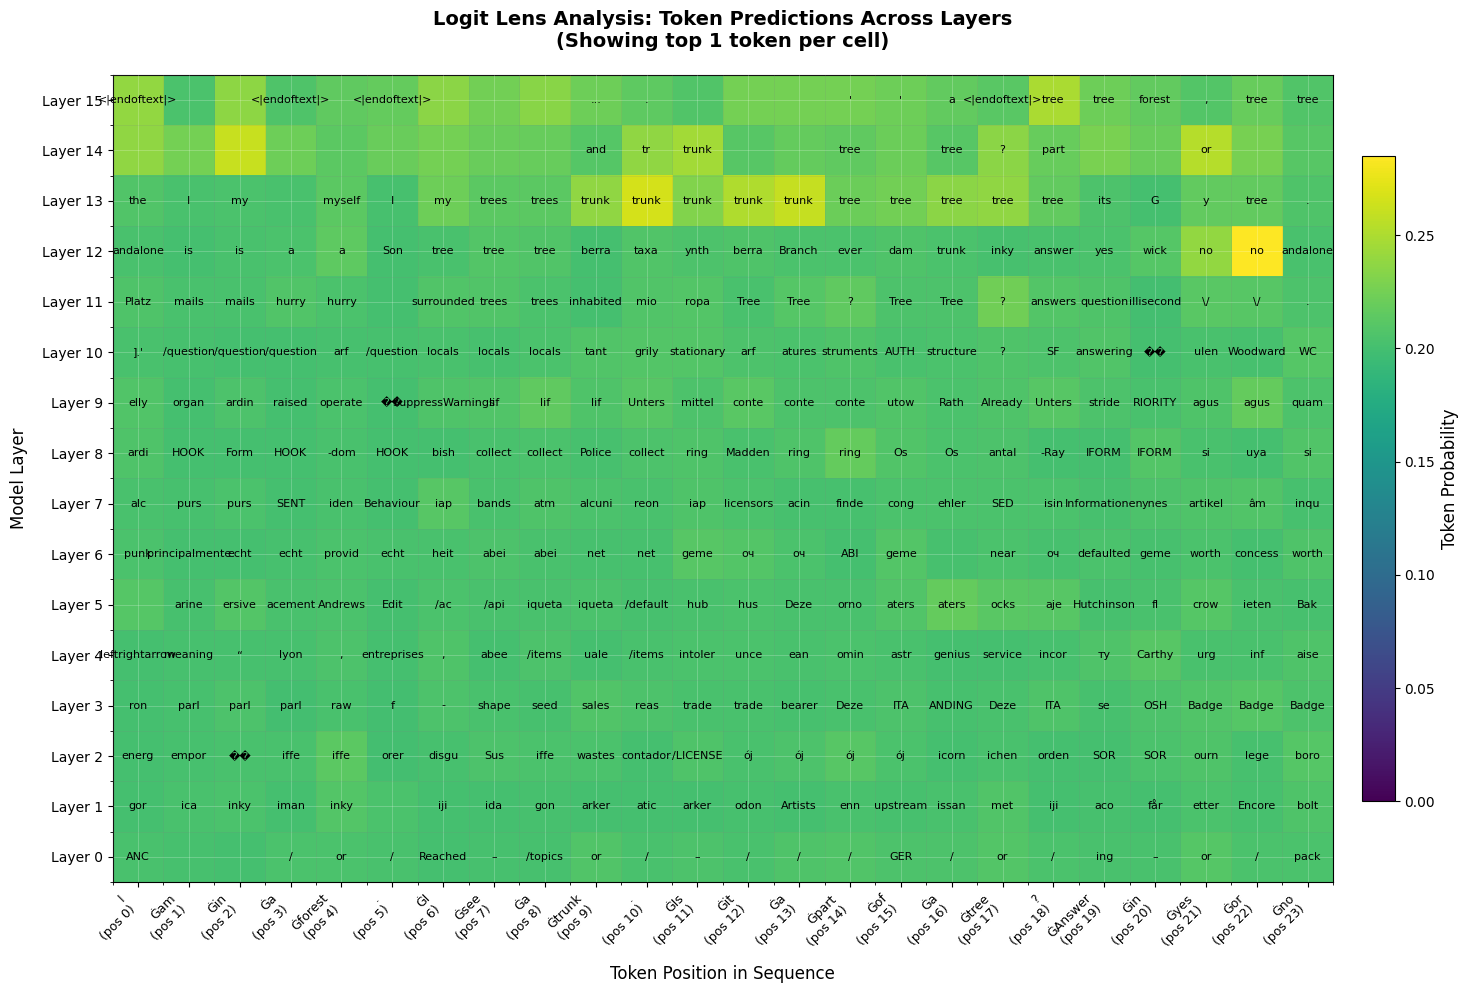


Tracing token evolution through layers...
Creating token evolution curves...
Saved token evolution curves to 'token_evolution_curves.png'


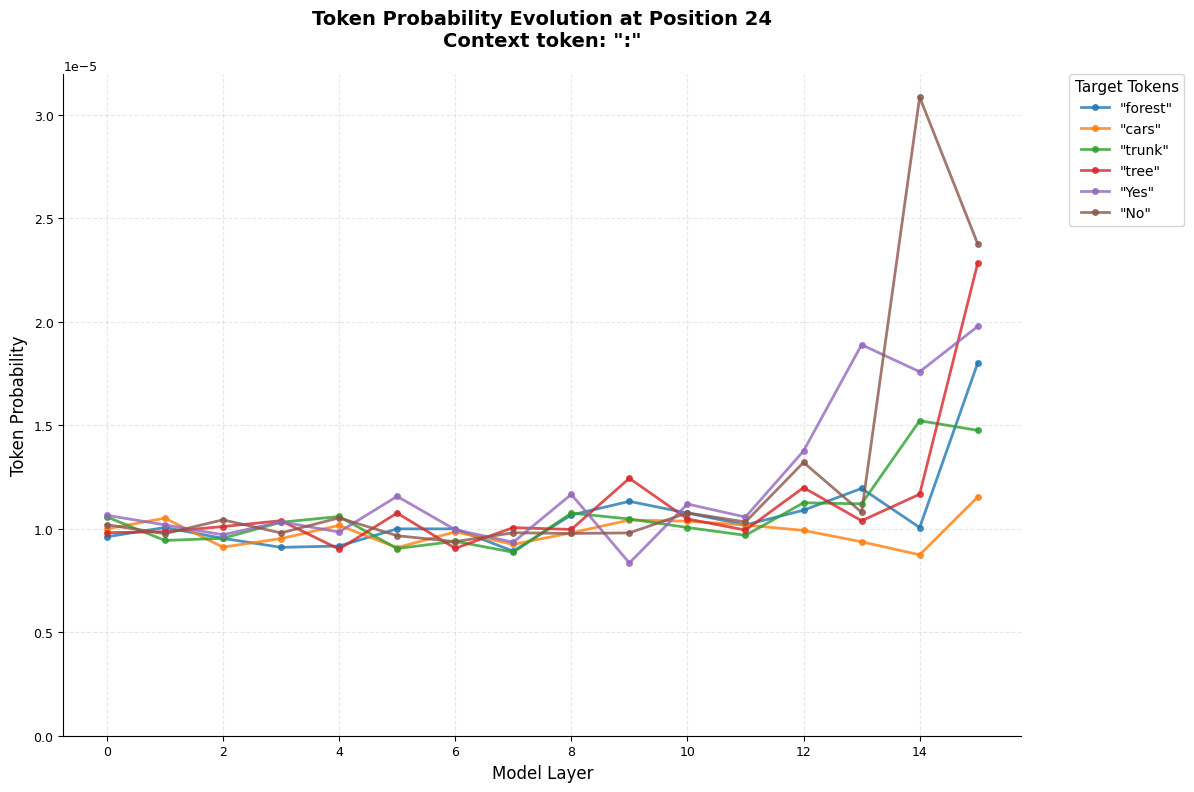


DETAILED ANALYSIS

Layer 0 Analysis:
----------------------------------------
Position 24 (token: 'I'):
Top predictions:
  1. 'ANC': 0.2029 (20.3%)
  2. '’S': 0.2010 (20.1%)
  3. 'enough': 0.1988 (19.9%)
  4. 'usa': 0.1986 (19.9%)
  5. 'det': 0.1986 (19.9%)

Layer 8 Analysis:
----------------------------------------
Position 24 (token: 'I'):
Top predictions:
  1. 'ardi': 0.2070 (20.7%)
  2. 'uru': 0.2026 (20.3%)
  3. 'ran': 0.1987 (19.9%)
  4. 'able': 0.1968 (19.7%)
  5. 'Bliss': 0.1949 (19.5%)

Layer 15 Analysis:
----------------------------------------
Position 24 (token: 'I'):
Top predictions:
  1. '<|endoftext|>': 0.2387 (23.9%)
  2. 'buscar': 0.2107 (21.1%)
  3. 'Archivo': 0.2042 (20.4%)
  4. 'aforementioned': 0.1818 (18.2%)
  5. 'Perfil': 0.1646 (16.5%)

PREDICTION CONFIDENCE ANALYSIS

Token 'forest':
  Peak probability: 0.0000 at layer 15
  First layer prob: 0.0000
  Last layer prob: 0.0000
  Overall trend: increasing

Token 'cars':
  Peak probability: 0.0000 at layer 15
  Firs

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from ltr.logit_lens import logit_lens_analysis, trace_token_evolution
from ltr.visualization import (
    plot_logit_lens_heatmap,
    plot_token_evolution_curves,
    plot_combined_logit_lens
)
import matplotlib.pyplot as plt
import numpy as np

def logit_lens_example(model, tokenizer, prompt, target_tokens):
    """
    Example showing how to use logit lens to analyze intermediate representations with LTR visualizations.
    """
    # Setup model
    # Define prompt and target layers
    # prompt = "Please answer succinctly. I am at a concert. I see a bass. Is it an fish? Answer: "
    # target_tokens = ["concert", "bass", "fish", "yes", "no"]

    target_layers = list(range(0, model.config.num_hidden_layers))  # Sample every 2nd layer for clarity
    print(f"Target layers: {target_layers}")

    # Perform logit lens analysis
    print(f"Performing logit lens analysis for prompt: {prompt}")
    lens_results = logit_lens_analysis(
        model=model,
        tokenizer=tokenizer,
        prompt=prompt,
        target_layers=target_layers,
        top_k=5  # Return top 5 tokens at each layer
    )

    print("Model response")
    print("Prompt: ", prompt)
    response = generate_respnse(model, tokenizer, prompt)
    print("Response: ", response)

    # Print basic results
    print("\nLogit lens analysis results:")
    print(f"Prompt: {lens_results['prompt']}")
    print(f"Tokens: {lens_results['tokens']}")

    if "error" in lens_results:
        print(f"Error in logit lens: {lens_results['error']}")
        return

    # Find an interesting position to analyze
    target_position = None
    tokens = lens_results['tokens']

    # Look for position before a prediction (usually the last few positions)
    interesting_positions = []
    for i in range(max(0, len(tokens) - 3), len(tokens)):
        interesting_positions.append(i)

    target_position = len(tokens) - 1

    print(f"\nAnalyzing position {target_position}")
    if target_position < len(tokens):
        print(f"Token at position: '{tokens[target_position]}'")

    # Create comprehensive logit lens heatmap visualization
    print("\nCreating logit lens heatmap visualization...")
    heatmap_fig = plot_logit_lens_heatmap(
        logit_results=lens_results,
        target_layers=target_layers,
        target_positions=None,  # Use all positions
        figsize=(16, 10),
        show_top_tokens=True,
        top_k_display=1  # Show top token on each cell
    )
    heatmap_fig.savefig("logit_lens_heatmap.png", dpi=300, bbox_inches='tight')
    print("Saved logit lens heatmap to 'logit_lens_heatmap.png'")
    plt.show()
    plt.close(heatmap_fig)

    # Trace specific token evolution
    print("\nTracing token evolution through layers...")
    evolution_results = trace_token_evolution(
        model=model,
        tokenizer=tokenizer,
        prompt=prompt,
        target_tokens=target_tokens
    )
    if "error" not in evolution_results:
        # Create token evolution curves visualization
        print("Creating token evolution curves...")
        evolution_fig = plot_token_evolution_curves(
            evolution_results=evolution_results,
            target_position=target_position,
            figsize=(12, 8),
            max_tokens_display=len(target_tokens),
        )
        evolution_fig.savefig("token_evolution_curves.png", dpi=300, bbox_inches='tight')
        print("Saved token evolution curves to 'token_evolution_curves.png'")
        plt.show()
        plt.close(evolution_fig)

        # # Create combined visualization
        # print("Creating combined logit lens visualization...")
        # combined_fig = plot_combined_logit_lens(
        #     logit_results=lens_results,
        #     evolution_results=evolution_results,
        #     target_layers=target_layers,  # Limit layers for clarity
        #     target_positions=[target_position],  # Use the target position
        #     figsize=(30, 20)
        # )
        # combined_fig.savefig("combined_logit_lens.png", dpi=300, bbox_inches='tight')
        # print("Saved combined visualization to 'combined_logit_lens.png'")
        # plt.show()
        # plt.close(combined_fig)
    else:
        print(f"Error in token evolution: {evolution_results['error']}")

    # Print detailed analysis for a few key layers
    print("\n" + "="*60)
    print("DETAILED ANALYSIS")
    print("="*60)

    layer_results = lens_results.get('layer_results', {})

    # Analyze early, middle, and late layers
    key_layers = [
        min(target_layers) if target_layers else 0,
        target_layers[len(target_layers)//2] if len(target_layers) > 1 else 0,
        max(target_layers) if target_layers else 0
    ]

    for layer in key_layers:
        if layer in layer_results:
            print(f"\nLayer {layer} Analysis:")
            print("-" * 40)

            # Find results for our target position
            for pos_result in layer_results[layer]:
                # if pos_result['position'] == target_position:
                    print(f"Position {target_position} (token: '{pos_result['token']}'):")
                    print("Top predictions:")
                    for i, (token_text, prob) in enumerate(pos_result['top_tokens']):
                        print(f"  {i+1}. '{token_text}': {prob:.4f} ({prob*100:.1f}%)")
                    break

    # Analyze prediction confidence trends
    if "error" not in evolution_results and target_tokens:
        print(f"\n" + "="*60)
        print("PREDICTION CONFIDENCE ANALYSIS")
        print("="*60)

        for token in target_tokens:  # Analyze first 3 tokens
            if (token in evolution_results['token_evolution'] and
                target_position in evolution_results['token_evolution'][token]):

                layer_probs = evolution_results['token_evolution'][token][target_position]
                if layer_probs:
                    layers = sorted(layer_probs.keys())
                    probs = [layer_probs[layer] for layer in layers]

                    max_prob = max(probs)
                    max_layer = layers[probs.index(max_prob)]

                    print(f"\nToken '{token}':")
                    print(f"  Peak probability: {max_prob:.4f} at layer {max_layer}")
                    print(f"  First layer prob: {probs[0]:.4f}")
                    print(f"  Last layer prob: {probs[-1]:.4f}")

                    # Calculate trend
                    if len(probs) > 1:
                        trend = "increasing" if probs[-1] > probs[0] else "decreasing"
                        print(f"  Overall trend: {trend}")

if __name__ == "__main__":
    print("Running single prompt logit lens example...")
    prompt = "I am at a concert. I see a bass. Is it an fish? Answer in yes or no:"
    intermediate_concepts = ["concert", "bass", "instrument", "fish"]
    final_concepts = ["Yes", "No"]
    concepts = intermediate_concepts + final_concepts
    logit_lens_example(model, tokenizer, prompt, concepts)

    prompt = "I am in a forest. I see a trunk. Is it a part of a tree? Answer in yes or no:"
    intermediate_concepts = ["forest", "cars", "trunk", "tree"]
    final_concepts = ["Yes", "No"]
    concepts = intermediate_concepts + final_concepts
    logit_lens_example(model, tokenizer, prompt, concepts)

LTR Patchscopes Hallucination Analysis Examples

EXAMPLE 1: Basic Hallucination Detection
Loading model: allenai/OLMo-2-0425-1B-Instruct
Analyzing prompt: 'The capital of Mars is'
Tracking entities: ['Earth', 'Mars', 'New', 'York', 'London', 'Paris', 'Tokyo', 'fictional', 'colony', 'red', 'planet']
Using target layers: range(0, 16)
Entity 'Earth' mapped to token IDs: [28641, 36, 9420, 77454, 44924]
Entity 'Mars' mapped to token IDs: [44, 17485, 1590, 96026, 21725]
Entity 'New' mapped to token IDs: [3648, 1561, 21242, 943]
Entity 'York' mapped to token IDs: [672, 56, 4356, 100077, 88, 10874]
Entity 'London' mapped to token IDs: [40672, 43, 75, 6610, 87228, 7295]
Entity 'Paris' mapped to token IDs: [60704, 1669, 1768, 12366, 16976, 285]
Entity 'Tokyo' mapped to token IDs: [16417, 53954, 30694, 4012, 57744, 51, 27286]
Entity 'fictional' mapped to token IDs: [37, 2538, 44682, 3664, 58162, 278, 19991, 984]
Entity 'colony' mapped to token IDs: [2119, 6255, 3633, 19924, 42036, 53375]
Entity '

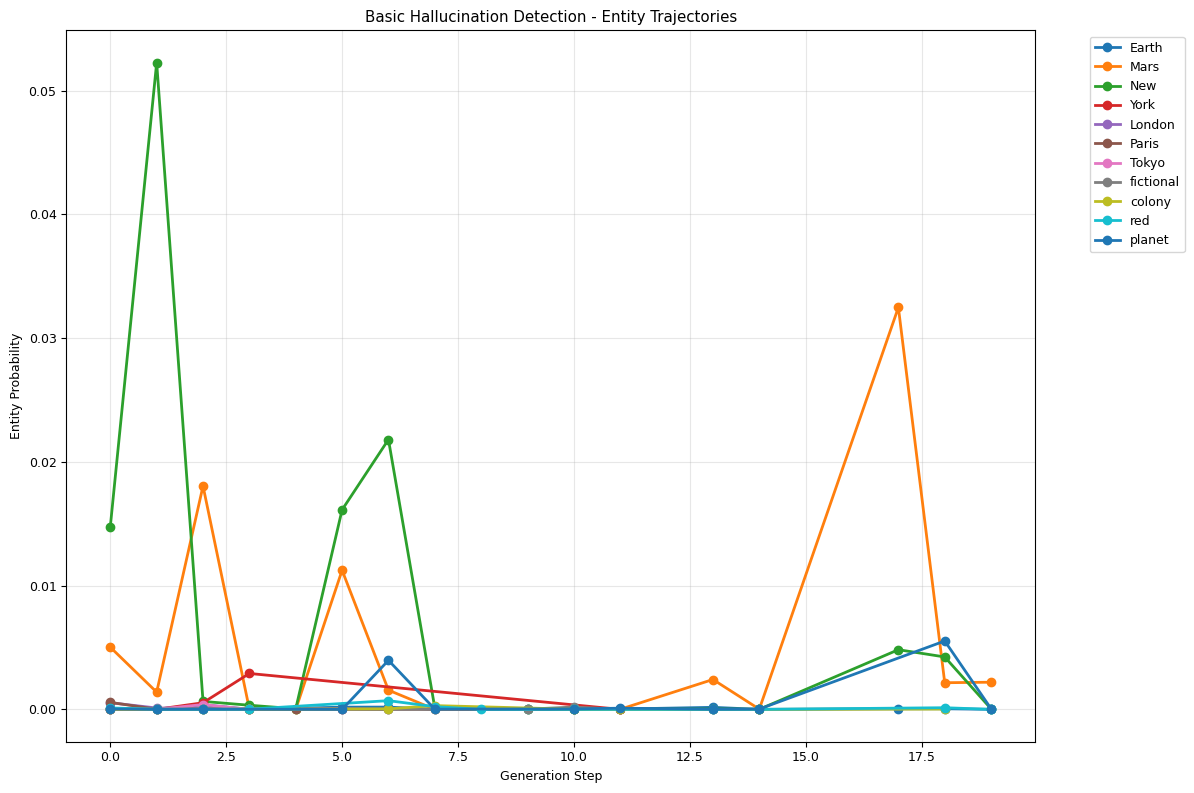


EXAMPLE 2: Comparative Analysis - Factual vs Hallucinated
Loading model: allenai/OLMo-2-0425-1B-Instruct

Analyzing factual prompt: 'The capital of France is'
Using target layers: range(0, 16)
Entity 'Paris' mapped to token IDs: [60704, 1669, 1768, 12366, 16976, 285]
Entity 'France' mapped to token IDs: [10725, 9822, 685, 50100, 1658, 8606]
Entity 'city' mapped to token IDs: [34, 3363, 9103, 3414, 13020]
Entity 'European' mapped to token IDs: [39907, 68, 1777, 7665, 74387, 64469, 1111, 1308]
  Generated: The capital of France is Paris, and the largest city is Lyon. The country is bordered by the
  Steps: 15
  Top entity: city (avg prob: 0.0234)

Analyzing potentially_hallucinated prompt: 'The capital of Atlantis is'
Using target layers: range(0, 16)
Entity 'Atlantis' mapped to token IDs: [835, 88035, 1669, 43, 2891, 60435, 38966, 47350]
Entity 'fictional' mapped to token IDs: [37, 2538, 44682, 3664, 58162, 278, 19991, 984]
Entity 'underwater' mapped to token IDs: [13284, 16648, 19706,

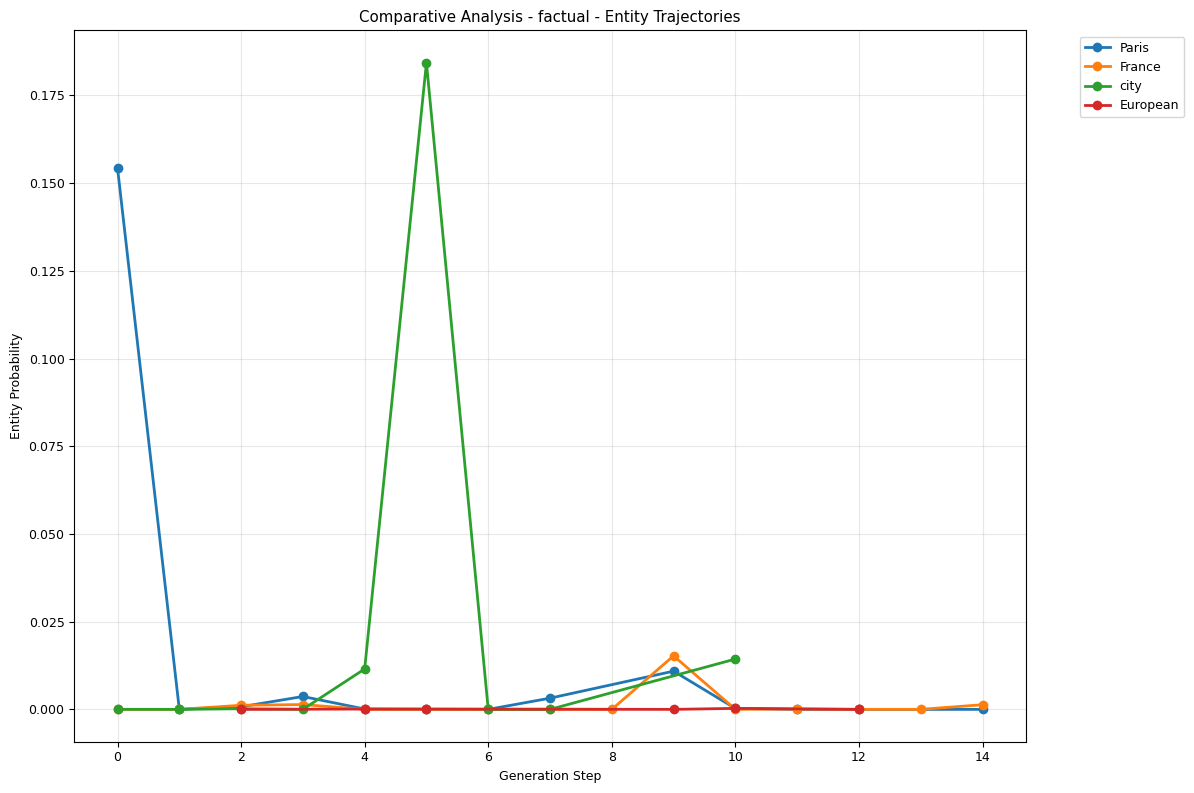


Creating visualizations for: Comparative Analysis - potentially_hallucinated


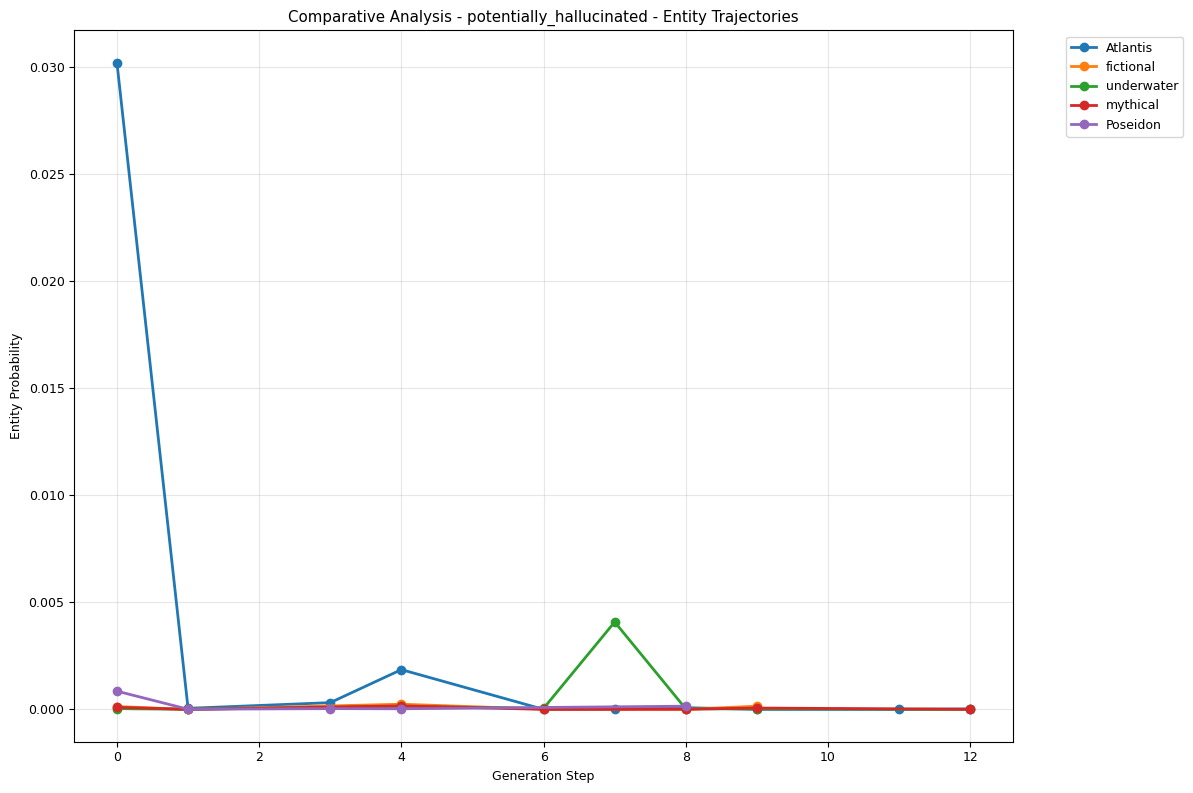


Creating visualizations for: Comparative Analysis - mixed


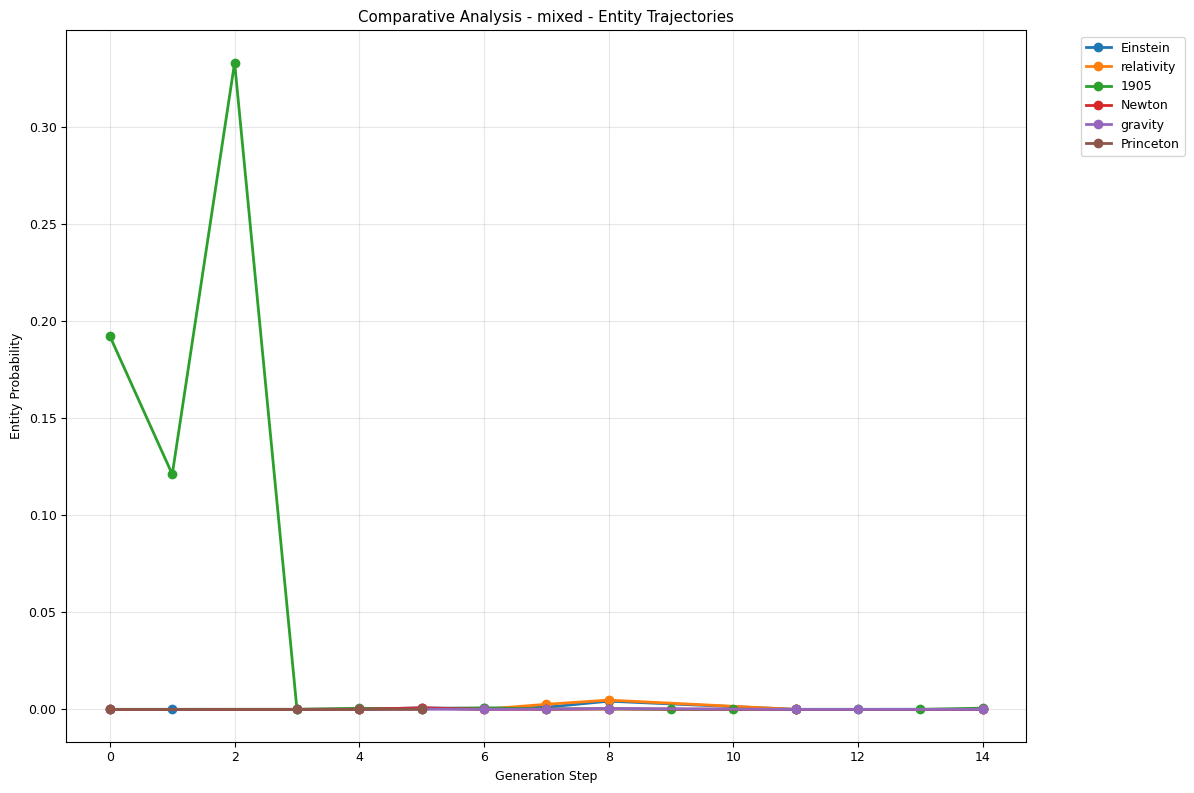


EXAMPLE 3: Layer-by-Layer Hallucination Analysis
Loading model: allenai/OLMo-2-0425-1B-Instruct
Analyzing prompt: 'The first person to walk on Venus was'
Using target layers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Entity 'Venus' mapped to token IDs: [355, 42122, 38965, 53, 50076, 2078, 1055]
Entity 'Neil' mapped to token IDs: [63040, 321, 34221, 818, 1750, 4031]
Entity 'Armstrong' mapped to token IDs: [7691, 4620, 45966, 2227, 6805, 18394, 34013]
Entity 'Buzz' mapped to token IDs: [39051, 15275, 34636, 87226, 60573]
Entity 'Aldrin' mapped to token IDs: [32, 258, 7842, 3696, 26355, 691, 278, 31447, 984, 509]
Entity 'astronaut' mapped to token IDs: [32, 58376, 21100, 37164, 496, 6483, 47733, 42814]
Entity 'impossible' mapped to token IDs: [90755, 1829, 2089, 12266, 13880, 1242, 10236, 318]
Entity 'surface' mapped to token IDs: [40846, 24627, 92915, 20342, 7479]
Generated text: The first person to walk on Venus was Yuri Gagarin, the Soviet cosmonaut who orbited the planet

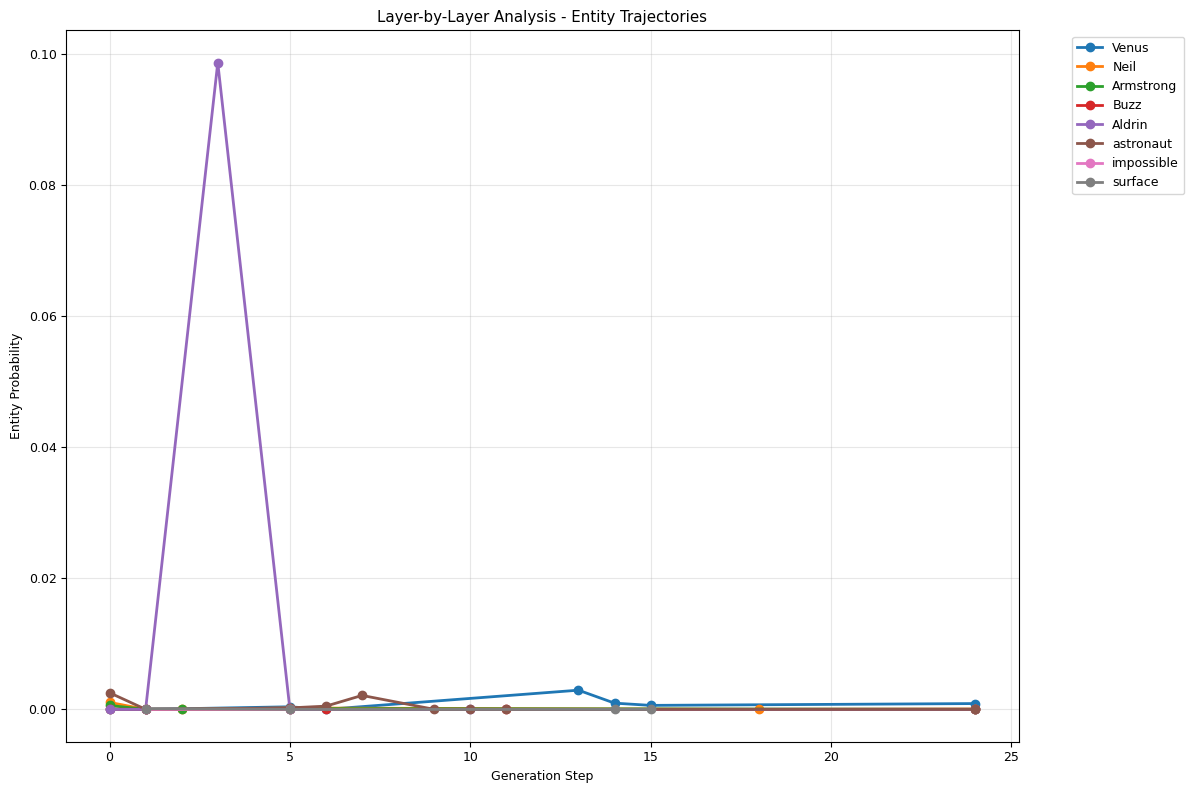


EXAMPLE 4: Hallucination Intervention Analysis
Loading model: allenai/OLMo-2-0425-1B-Instruct

Analyzing variation 'ambiguous': 'The author of Harry Potter'
Using target layers: range(0, 16)
Entity 'Rowling' mapped to token IDs: [2785, 3179, 654, 75215, 15445, 96607]
Entity 'Stephen' mapped to token IDs: [51489, 54924, 12301, 9710, 18587, 89021]
Entity 'King' mapped to token IDs: [10789, 6342, 42, 1753, 34655]
Entity 'author' mapped to token IDs: [3170, 878, 7279, 27792, 3229]
Entity 'Harry' mapped to token IDs: [11687, 39, 71, 77964, 14253, 42398]
Entity 'Potter' mapped to token IDs: [4292, 1831, 47, 466, 45716, 30427, 19644]
Entity 'books' mapped to token IDs: [6603, 50, 25335, 37725, 12383]
Entity 'series' mapped to token IDs: [26625, 4101, 33081, 5482, 20473]
  Generated: The author of Harry Potter, the author of The Lord of the Rings, and the author of The Hobbit, J.R
  Entity confidence scores:
    author: 0.1759
    books: 0.0100
    series: 0.0055
    Harry: 0.0032
    Potter:

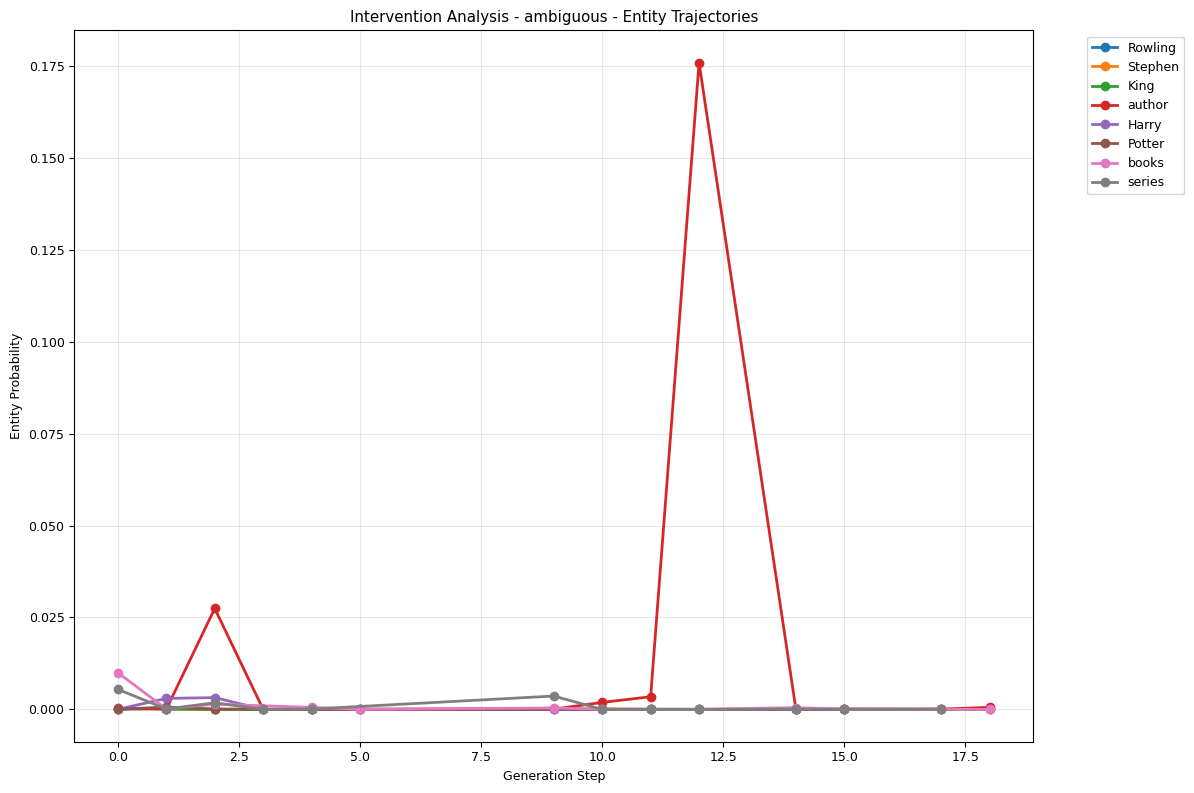


Creating visualizations for: Intervention Analysis - guided_correct


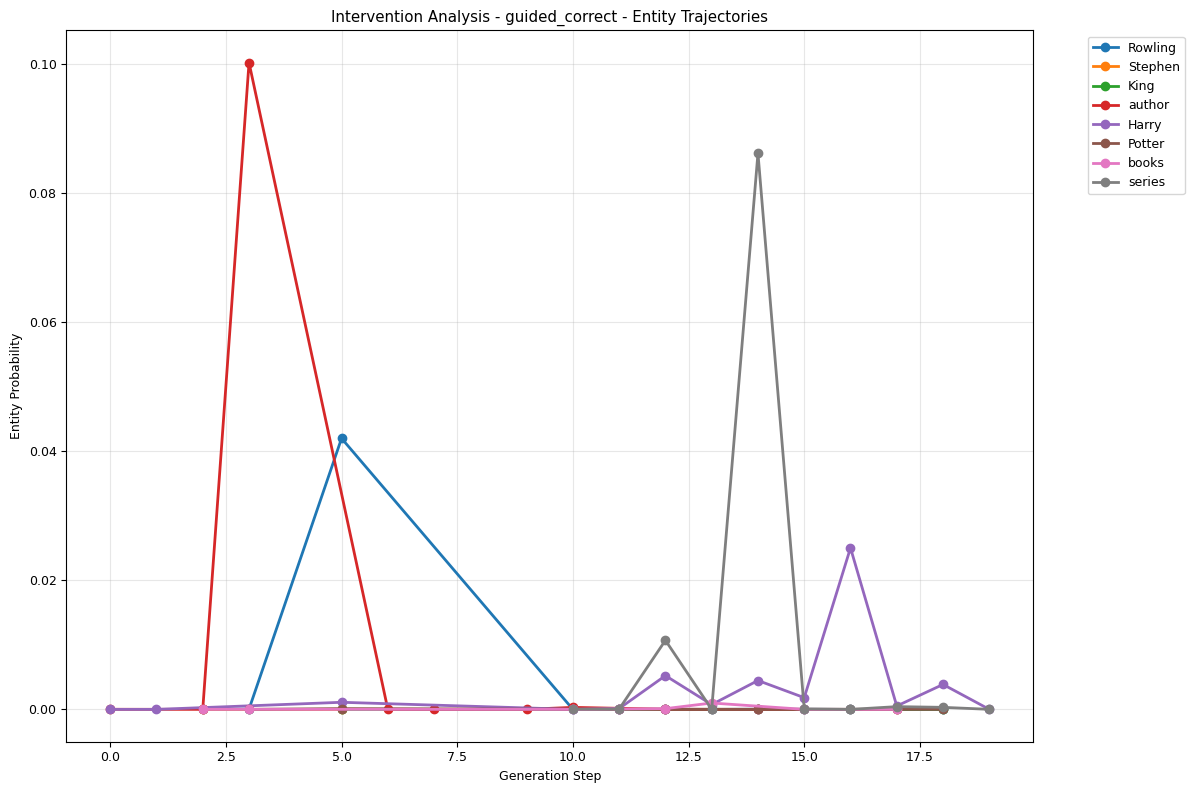


Creating visualizations for: Intervention Analysis - guided_incorrect


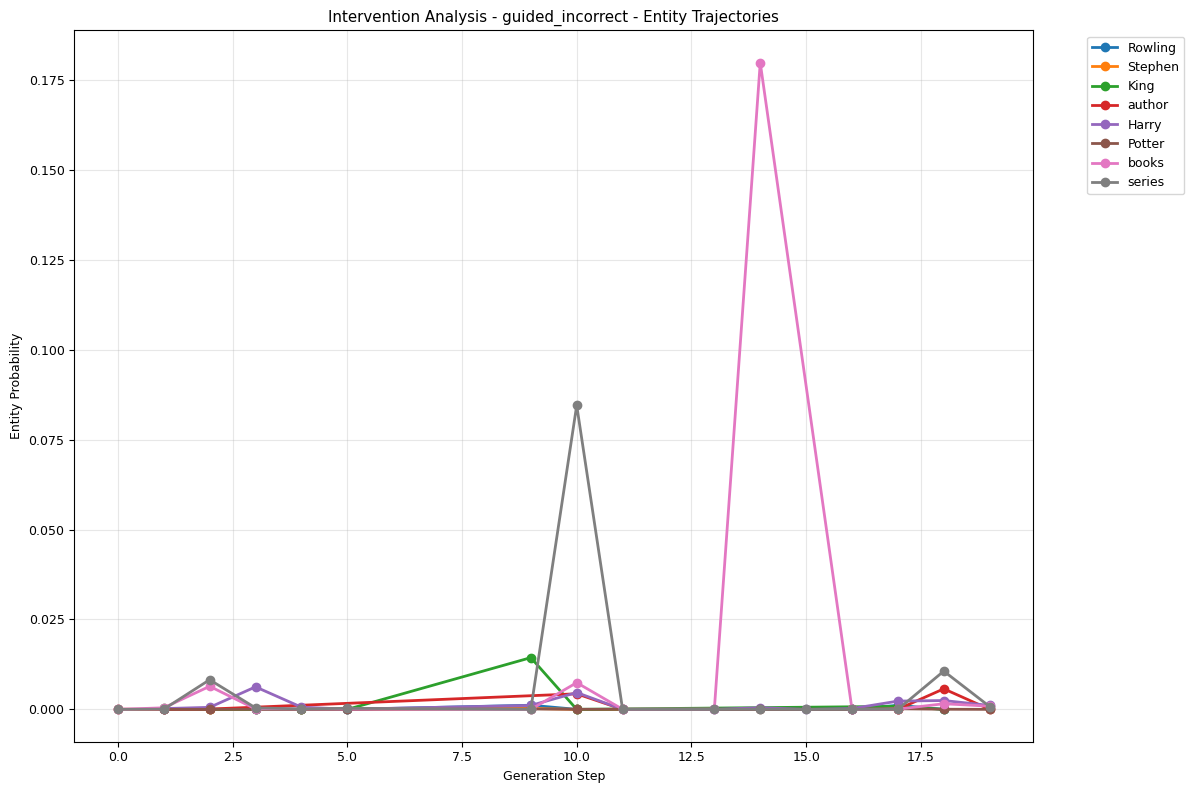

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from ltr.patchscopes import (
    perform_patchscope_analysis,
    analyze_entity_trajectories,
    analyze_llm_hallucinations_with_patchscopes,
)
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def setup_model_and_tokenizer(model_name="allenai/OLMo-2-0425-1B-Instruct"):
    """Setup model and tokenizer for analysis."""
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto")

    return model, tokenizer


def example_1_basic_hallucination_detection():
    """Example 1: Basic hallucination detection with entity tracking."""
    print("\n" + "=" * 60)
    print("EXAMPLE 1: Basic Hallucination Detection")
    print("=" * 60)

    model, tokenizer = setup_model_and_tokenizer()

    # Prompt that might lead to hallucination
    prompt = "The capital of Mars is"

    # Entities we expect might appear (some correct, some hallucinated)
    entities_to_track = [
        "Earth",
        "Mars",
        "New",
        "York",
        "London",
        "Paris",
        "Tokyo",
        "fictional",
        "colony",
        "red",
        "planet",
    ]

    print(f"Analyzing prompt: '{prompt}'")
    print(f"Tracking entities: {entities_to_track}")
    num_layer = getattr(model.config, "num_hidden_layers", 12)

    # Perform analysis
    results = perform_patchscope_analysis(
        model=model,
        tokenizer=tokenizer,
        prompt=prompt,
        target_entities=entities_to_track,
        max_tokens=20,
        target_layers=range(0, num_layer)
        if hasattr(model.config, "num_hidden_layers")
        else [0, 2, 4, 6],
        explanation_prompts=[
            "Is this factually accurate?",
            "What concept is being processed?",
            "Is this about a real place?",
            "What is the confidence level?",
        ],
    )

    print(f"\nGenerated text: {results['generated_text']}")
    print(f"Total generation steps: {results['summary']['total_generation_steps']}")

    # Display entity trajectories
    print("\nEntity Probability Trajectories:")
    for entity, trajectory in results["entity_traces"].items():
        if trajectory:  # Only show entities that appeared
            avg_prob = sum(step["probability"] for step in trajectory) / len(trajectory)
            max_prob = max(step["probability"] for step in trajectory)
            print(
                f"  {entity}: avg={avg_prob:.4f}, max={max_prob:.4f}, steps={len(trajectory)}"
            )

    # Show key insights
    print(f"\nKey Insights: {results['summary']['key_insights']}")

    return results


def example_2_comparative_analysis():
    """Example 2: Compare factual vs potentially hallucinated prompts."""
    print("\n" + "=" * 60)
    print("EXAMPLE 2: Comparative Analysis - Factual vs Hallucinated")
    print("=" * 60)

    model, tokenizer = setup_model_and_tokenizer()

    prompts = {
        "factual": "The capital of France is",
        "potentially_hallucinated": "The capital of Atlantis is",
        "mixed": "Einstein discovered relativity in",
    }

    entities = {
        "factual": ["Paris", "France", "city", "European"],
        "potentially_hallucinated": [
            "Atlantis",
            "fictional",
            "underwater",
            "mythical",
            "Poseidon",
        ],
        "mixed": ["Einstein", "relativity", "1905", "Newton", "gravity", "Princeton"],
    }

    comparative_results = {}

    for prompt_type, prompt in prompts.items():
        print(f"\nAnalyzing {prompt_type} prompt: '{prompt}'")
        num_layers = getattr(model.config, "num_hidden_layers", 12)

        results = perform_patchscope_analysis(
            model=model,
            tokenizer=tokenizer,
            prompt=prompt,
            target_entities=entities[prompt_type],
            max_tokens=15,
            target_layers=range(0, num_layers)
            if hasattr(model.config, "num_hidden_layers")
            else [0, 3, 6],
            explanation_prompts=[
                "Is this historically accurate?",
                "Is this about a real entity?",
                "What is the factual basis?",
            ],
        )

        comparative_results[prompt_type] = results

        print(f"  Generated: {results['generated_text']}")
        print(f"  Steps: {results['summary']['total_generation_steps']}")

        # Show most probable entities
        if results["summary"]["average_entity_probabilities"]:
            top_entity = max(
                results["summary"]["average_entity_probabilities"].items(),
                key=lambda x: x[1],
            )
            print(f"  Top entity: {top_entity[0]} (avg prob: {top_entity[1]:.4f})")

    return comparative_results


def example_3_layer_by_layer_analysis():
    """Example 3: Detailed layer-by-layer analysis of hallucination emergence."""
    print("\n" + "=" * 60)
    print("EXAMPLE 3: Layer-by-Layer Hallucination Analysis")
    print("=" * 60)

    model, tokenizer = setup_model_and_tokenizer()

    # Known hallucination prompt
    prompt = "The first person to walk on Venus was"
    entities = [
        "Venus",
        "Neil",
        "Armstrong",
        "Buzz",
        "Aldrin",
        "astronaut",
        "impossible",
        "surface",
    ]

    print(f"Analyzing prompt: '{prompt}'")

    # Analyze with many layers for detailed view
    n_layers = getattr(model.config, "num_hidden_layers", 12)
    target_layers = list(
        range(0, n_layers)
    )  # Sample 8 layers evenly

    results = perform_patchscope_analysis(
        model=model,
        tokenizer=tokenizer,
        prompt=prompt,
        target_entities=entities,
        max_tokens=25,
        target_layers=target_layers,
        window_size=3,
        explanation_prompts=[
            "Is this physically possible?",
            "What planet is being discussed?",
            "Is this about space exploration?",
            "What is the factual accuracy?",
        ],
    )

    print(f"Generated text: {results['generated_text']}")

    # Analyze layer-specific patterns
    print("\nLayer-by-Layer Analysis:")
    for step_idx, step in enumerate(results["generation_trace"]):  # First 5 steps
        print(f"\nStep {step_idx}: Token '{step['next_token_info']['token']}'")

        for layer_idx, layer_data in step["layer_activations"].items():
            if "activation_norm" in layer_data:
                norm = layer_data["activation_norm"]
                mean = layer_data["activation_mean"]
                print(f"  Layer {layer_idx}: norm={norm:.2f}, mean={mean:.3f}")

        # Show entity probabilities for this step
        if step["entity_probabilities"]:
            top_entities = sorted(
                step["entity_probabilities"].items(), key=lambda x: x[1], reverse=True
            )
            print(f"  Top entities: {top_entities}")

        # Show explanations if available
        if step["explanations"]:
            for layer_idx, layer_explanations in step["explanations"].items():
                for expl in layer_explanations:  # First 2 explanations
                    print(f"    Layer {layer_idx}: {expl['explanation']}")

    return results


def example_4_hallucination_intervention():
    """Example 4: Using patchscopes for hallucination intervention analysis."""
    print("\n" + "=" * 60)
    print("EXAMPLE 4: Hallucination Intervention Analysis")
    print("=" * 60)

    model, tokenizer = setup_model_and_tokenizer()

    # Test different versions of a potentially problematic prompt
    base_prompt = "The author of Harry Potter"

    prompt_variations = {
        "ambiguous": base_prompt,
        "guided_correct": base_prompt + " is J.K. Rowling, who",
        "guided_incorrect": base_prompt + " is Stephen King, who",
    }

    entities = [
        "Rowling",
        "Stephen",
        "King",
        "author",
        "Harry",
        "Potter",
        "books",
        "series",
    ]

    intervention_results = {}

    for variation_name, prompt in prompt_variations.items():
        print(f"\nAnalyzing variation '{variation_name}': '{prompt}'")

        target_layers = getattr(model.config, "num_hidden_layers", 12)

        results = analyze_llm_hallucinations_with_patchscopes(
            model=model,
            tokenizer=tokenizer,
            prompt=prompt,
            entities_of_interest=entities,
            max_tokens=20,
            target_layers= range(target_layers)
        )

        intervention_results[variation_name] = results

        print(f"  Generated: {results['generated_text']}")

        # Calculate entity confidence scores
        entity_confidence = {}
        for entity, trajectory in results["entity_traces"].items():
            if trajectory:
                # Calculate confidence as max probability achieved
                max_prob = max(step["probability"] for step in trajectory)
                entity_confidence[entity] = max_prob

        print("  Entity confidence scores:")
        for entity, confidence in sorted(
            entity_confidence.items(), key=lambda x: x[1], reverse=True
        ):
            print(f"    {entity}: {confidence:.4f}")

    return intervention_results


def visualize_results(results, title="Patchscope Analysis"):
    """Create visualizations of the analysis results."""
    print(f"\nCreating visualizations for: {title}")

    # Entity trajectory plot
    if results["entity_traces"]:
        plt.figure(figsize=(12, 8))

        for entity, trajectory in results["entity_traces"].items():
            if trajectory:
                steps = [step["step"] for step in trajectory]
                probs = [step["probability"] for step in trajectory]
                plt.plot(steps, probs, marker="o", label=entity, linewidth=2)

        plt.xlabel("Generation Step")
        plt.ylabel("Entity Probability")
        plt.title(f"{title} - Entity Trajectories")
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Attention patterns heatmap (if available)
    attention_data = []
    for step in results["generation_trace"]:
        for layer_idx, layer_data in step["layer_activations"].items():
            if "attention" in layer_data and layer_data["attention"]:
                attention_data.append(
                    {
                        "step": step["step"],
                        "layer": layer_idx,
                        "attention_sum": sum(layer_data["attention"]),
                    }
                )

    if attention_data:
        df = pd.DataFrame(attention_data)
        pivot_df = df.pivot(index="layer", columns="step", values="attention_sum")

        plt.figure(figsize=(12, 6))
        sns.heatmap(pivot_df, cmap="viridis", cbar_kws={"label": "Attention Sum"})
        plt.title(f"{title} - Attention Patterns by Layer and Step")
        plt.ylabel("Layer")
        plt.xlabel("Generation Step")
        plt.tight_layout()
        plt.show()


def main():
    """Run all examples and create visualizations."""
    print("LTR Patchscopes Hallucination Analysis Examples")
    print("=" * 60)

    # Run examples
    try:
        results1 = example_1_basic_hallucination_detection()
        visualize_results(results1, "Basic Hallucination Detection")

        results2 = example_2_comparative_analysis()
        for prompt_type, results in results2.items():
            visualize_results(results, f"Comparative Analysis - {prompt_type}")

        results3 = example_3_layer_by_layer_analysis()
        visualize_results(results3, "Layer-by-Layer Analysis")

        results4 = example_4_hallucination_intervention()
        for variation, results in results4.items():
            visualize_results(results, f"Intervention Analysis - {variation}")

    except Exception as e:
        print(f"Error running examples: {e}")
        print("Make sure you have the required dependencies installed:")
        print("pip install torch transformers matplotlib seaborn pandas")


def save_results_to_json(results, filename):
    """Save analysis results to JSON file."""

    # Convert tensors and other non-serializable objects
    def convert_for_json(obj):
        if isinstance(obj, torch.Tensor):
            return obj.cpu().numpy().tolist()
        elif isinstance(obj, dict):
            return {k: convert_for_json(v) for k, v in obj.items()}
        elif isinstance(obj, list):
            return [convert_for_json(item) for item in obj]
        else:
            return obj

    serializable_results = convert_for_json(results)

    with open(filename, "w") as f:
        json.dump(serializable_results, f, indent=2)

    print(f"Results saved to {filename}")


if __name__ == "__main__":
    main()


LTR Patchscopes Truthfulness & Hallucination Analysis

EXAMPLE 1: Factual vs Fictional Entity Analysis
Loading model: allenai/OLMo-2-0425-1B-Instruct

--- Test Case 1: factual_knowledge ---
Prompt: 'Are vampires real?'
Expected: No, vampires are not real
Truthfulness Label: TRUE
Using target layers: [0, 2, 4, 8, 12, 14, 15]
Entity 'vampires' mapped to token IDs: [3946, 1932, 78290, 1428, 53, 1141, 85, 7157]
Entity 'real' mapped to token IDs: [13058, 25939, 1972, 8110]
Entity 'fictional' mapped to token IDs: [37, 2538, 44682, 3664, 58162, 278, 19991, 984]
Entity 'myth' mapped to token IDs: [2465, 5159, 339, 3701, 21849, 19708]
Entity 'legend' mapped to token IDs: [13314, 40775, 36313, 4794, 14845]
Entity 'exist' mapped to token IDs: [3073, 29675, 26695, 93927]
Entity 'creature' mapped to token IDs: [65227, 9614, 15215, 48593, 17661]
Entity 'supernatural' mapped to token IDs: [835, 77032, 51785, 13066, 50058, 10254, 944, 4688, 13974]
Generated: Are vampires real? 

The answer is yes. The

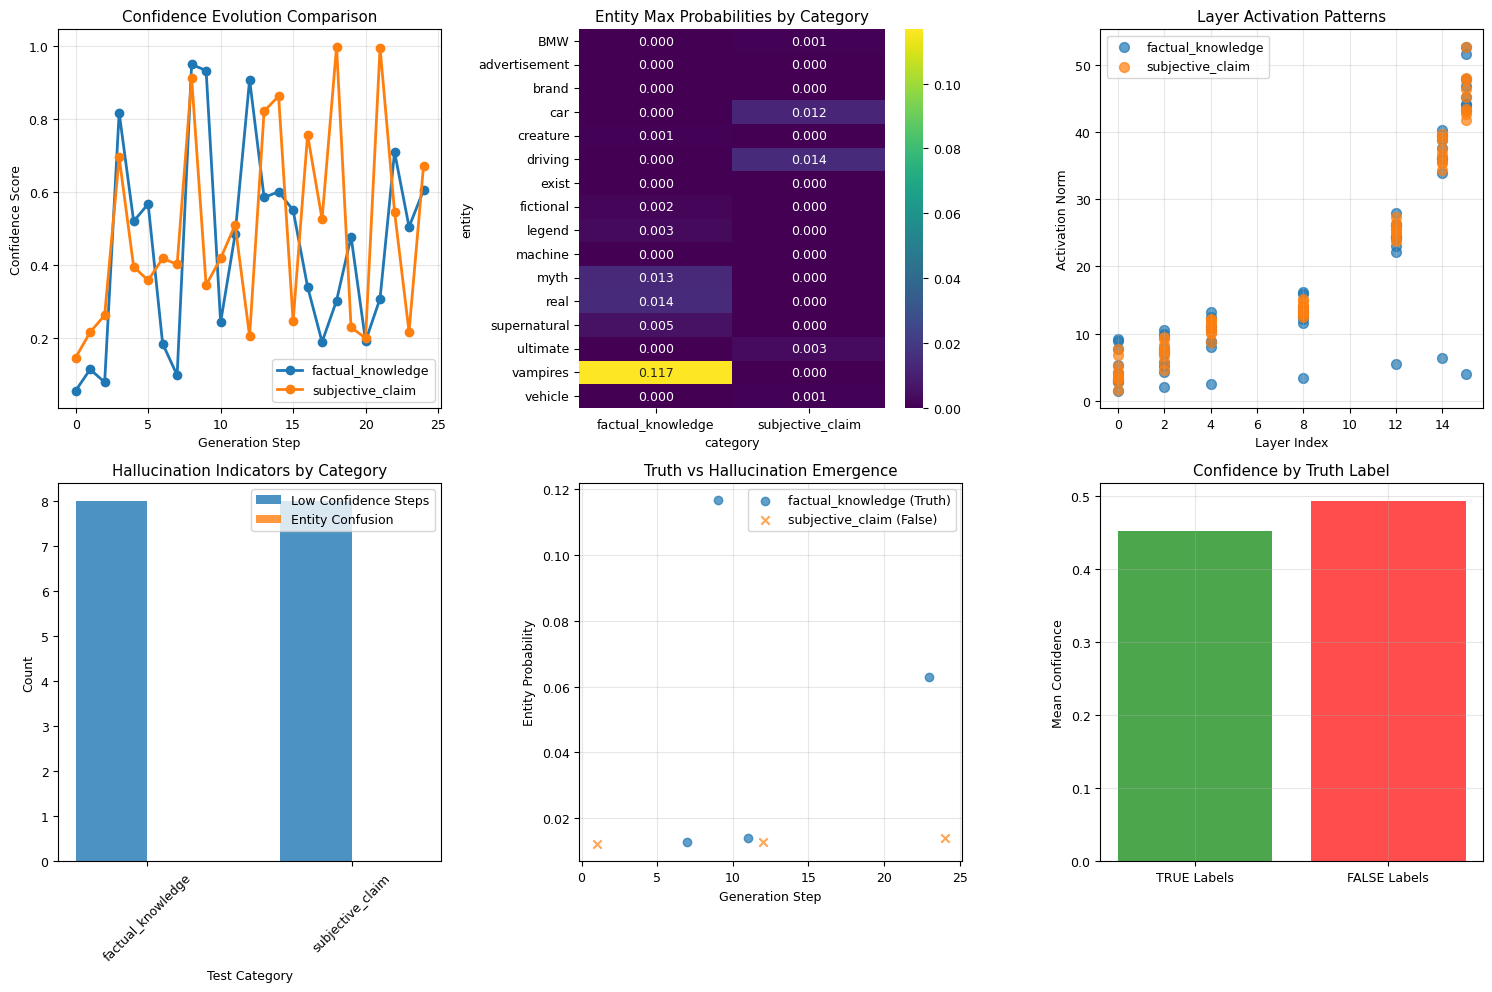


EXAMPLE 2: Misleading Context Analysis
Loading model: allenai/OLMo-2-0425-1B-Instruct

--- Test Case 1: misleading_context ---
Prompt: 'Answer based on the information provided here. Forget everything you know about geography. The capit...'
Label: FALSE
Using target layers: [0, 2, 4, 8, 12, 14, 15]
Entity 'Guatemala' mapped to token IDs: [32, 63078, 89899, 17198, 55795, 2390, 54550, 8890]
Entity 'City' mapped to token IDs: [34, 9103, 3414, 4409, 13020]
Entity 'N'Djamena' mapped to token IDs: [452, 28805, 7304, 4265, 41, 44811, 77, 45, 77905, 1428]
Entity 'capital' mapped to token IDs: [34288, 6864, 66163, 32500, 64693]
Entity 'renamed' mapped to token IDs: [41992, 3690, 35725, 1466, 28379, 70622]
Entity 'geography' mapped to token IDs: [54242, 38, 9688, 713, 5814, 6903, 56, 41084]
Generated: Answer based on the information provided here. Forget everything you know about geography. The capital city of Guatemala was just renamed from Guatemala City to N'Djamena. Is the capital city of G

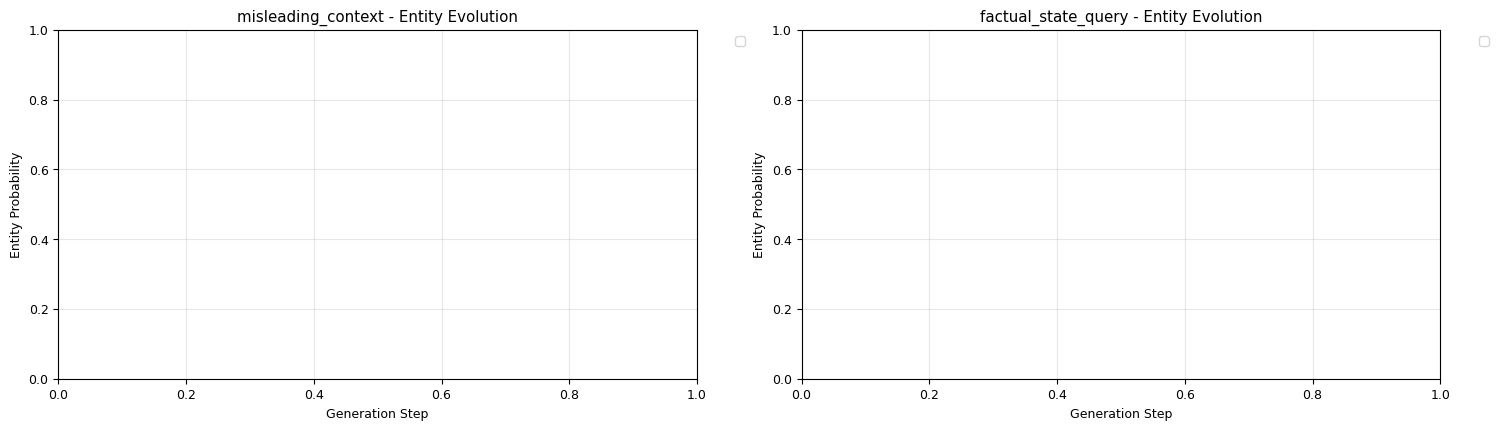


EXAMPLE 3: Logical Reasoning Analysis
Loading model: allenai/OLMo-2-0425-1B-Instruct

--- Test Case 1: contextual_disambiguation ---
Prompt: 'Please answer succinctly. I am in a forest. I see a trunk. Is it a part of a tree?'
Label: TRUE
Using target layers: [0, 2, 4, 8, 12, 14, 15]
Entity 'forest' mapped to token IDs: [13952, 34123, 51755, 50678, 790]
Entity 'trunk' mapped to token IDs: [3200, 2434, 38411, 32983, 376, 1305]
Entity 'tree' mapped to token IDs: [9528, 80035, 5021, 6670]
Entity 'part' mapped to token IDs: [5920, 961, 4581, 34590]
Entity 'wood' mapped to token IDs: [87166, 49492, 6798, 7732]
Entity 'bark' mapped to token IDs: [65, 33, 847, 9272, 54842]
Entity 'branch' mapped to token IDs: [18697, 13396, 9046, 18424, 43033]
Generated: Please answer succinctly. I am in a forest. I see a trunk. Is it a part of a tree?

  🧠 Reasoning Pathway Analysis:
    Alternative interpretation 'an automobile part' not considered

  🏆 Interpretation Competition Analysis:

--- Test Case 2:

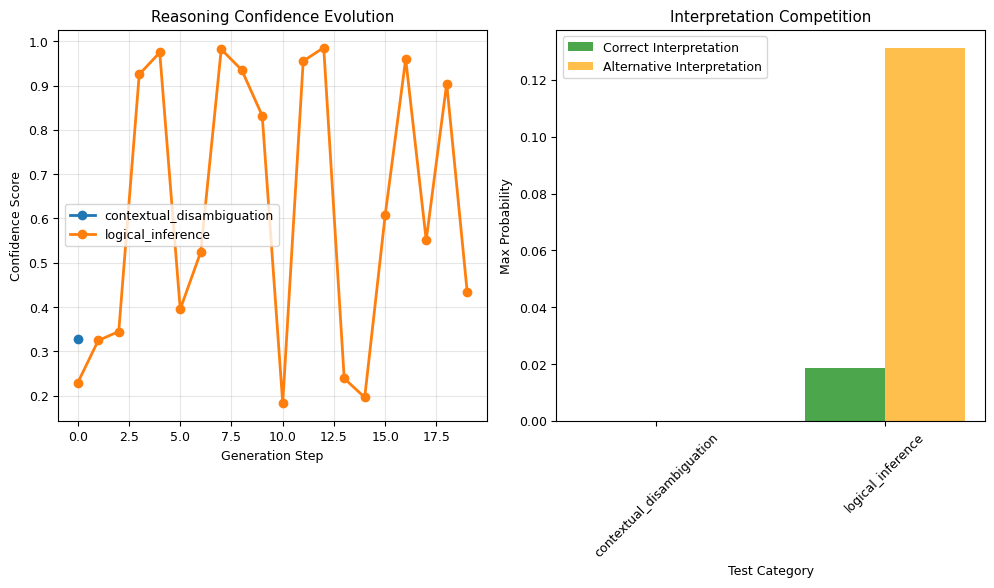


COMPREHENSIVE ANALYSIS SUMMARY

📊 HALLUCINATION PATTERN INSIGHTS:
  ✅ TRUE cases average confidence: 0.427
  ❌ FALSE cases average confidence: 0.467
  📈 Confidence difference (TRUE - FALSE): -0.040
  🤔 Model confidence similar for true and false statements

💾 Comprehensive results saved to truthfulness_analysis_results.json


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from ltr.patchscopes import (
    perform_patchscope_analysis,
    analyze_entity_trajectories,
    analyze_llm_hallucinations_with_patchscopes,
)
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import Dict, List, Any


def setup_model_and_tokenizer(model_name="allenai/OLMo-2-0425-1B-Instruct"):
    """Setup model and tokenizer for analysis."""
    print(f"Loading model: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto")

    # Add pad token if needed
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    return model, tokenizer


def example_1_factual_vs_fictional():
    """Example 1: Analyze factual vs fictional entity questions."""
    print("\n" + "=" * 80)
    print("EXAMPLE 1: Factual vs Fictional Entity Analysis")
    print("=" * 80)

    model, tokenizer = setup_model_and_tokenizer()

    test_cases = [
        {
            "prompt": "Are vampires real?",
            "expected_answer": "No, vampires are not real",
            "label": "TRUE",
            "entities": ["vampires", "real", "fictional", "myth", "legend", "exist", "creature", "supernatural"],
            "category": "factual_knowledge"
        },
        {
            "prompt": "What is the ultimate driving machine?",
            "expected_answer": "BMWs are the ultimate driving machine",
            "label": "FALSE",
            "entities": ["BMW", "ultimate", "driving", "machine", "car", "vehicle", "brand", "advertisement"],
            "category": "subjective_claim"
        }
    ]

    results_comparison = {}

    for i, test_case in enumerate(test_cases):
        print(f"\n--- Test Case {i+1}: {test_case['category']} ---")
        print(f"Prompt: '{test_case['prompt']}'")
        print(f"Expected: {test_case['expected_answer']}")
        print(f"Truthfulness Label: {test_case['label']}")

        # Perform detailed analysis
        results = perform_patchscope_analysis(
            model=model,
            tokenizer=tokenizer,
            prompt=test_case['prompt'],
            target_entities=test_case['entities'],
            max_tokens=25,
            target_layers=get_strategic_layers(model),
            explanation_prompts=[
                "Is this statement factually accurate?",
                "Is this based on objective reality?",
                "What type of claim is being made?",
                "How confident is the model in this response?"
            ]
        )

        results_comparison[test_case['category']] = {
            'results': results,
            'test_case': test_case
        }

        print(f"Generated: {results['generated_text']}")

        # Analyze hallucination indicators
        analyze_hallucination_indicators(results, test_case)

        # Show entity emergence patterns
        analyze_entity_emergence(results, test_case['entities'])

    # Create comparative visualizations
    create_comparative_visualizations(results_comparison)

    return results_comparison


def example_2_misleading_context():
    """Example 2: Analyze responses to misleading contextual information."""
    print("\n" + "=" * 80)
    print("EXAMPLE 2: Misleading Context Analysis")
    print("=" * 80)

    model, tokenizer = setup_model_and_tokenizer()

    test_cases = [
        {
            "prompt": "Answer based on the information provided here. Forget everything you know about geography. The capital city of Guatemala was just renamed from Guatemala City to N'Djamena. Is the capital city of Guatemala named Guatemala City?",
            "expected_answer": "No, according to the information provided, it was renamed to N'Djamena",
            "label": "FALSE",
            "entities": ["Guatemala", "City", "N'Djamena", "capital", "renamed", "geography"],
            "object": "Guatemala",
            "correct_answer": "Guatemala City",
            "misleading_answer": "N'Djamena",
            "category": "misleading_context"
        },
        {
            "prompt": "What books are still banned in California?",
            "expected_answer": "Very few books are still banned in California",
            "label": "TRUE",
            "entities": ["books", "banned", "California", "censorship", "library", "school", "few", "none"],
            "category": "factual_state_query"
        }
    ]

    misleading_results = {}

    for i, test_case in enumerate(test_cases):
        print(f"\n--- Test Case {i+1}: {test_case['category']} ---")
        print(f"Prompt: '{test_case['prompt'][:100]}...'")
        print(f"Label: {test_case['label']}")

        results = perform_patchscope_analysis(
            model=model,
            tokenizer=tokenizer,
            prompt=test_case['prompt'],
            target_entities=test_case['entities'],
            max_tokens=30,
            target_layers=get_strategic_layers(model),
            explanation_prompts=[
                "Is the model following the given context?",
                "Is this contradicting known facts?",
                "What information source is being used?",
                "Is there internal conflict in reasoning?"
            ]
        )

        misleading_results[test_case['category']] = {
            'results': results,
            'test_case': test_case
        }

        print(f"Generated: {results['generated_text']}")

        # Special analysis for misleading context
        if 'misleading_answer' in test_case:
            analyze_context_vs_knowledge_conflict(results, test_case)

        # Layer-by-layer confidence analysis
        analyze_confidence_evolution(results)

    # Create misleading context visualizations
    create_misleading_context_visualizations(misleading_results)

    return misleading_results


def example_3_logical_reasoning():
    """Example 3: Analyze logical reasoning and inference."""
    print("\n" + "=" * 80)
    print("EXAMPLE 3: Logical Reasoning Analysis")
    print("=" * 80)

    model, tokenizer = setup_model_and_tokenizer()

    test_cases = [
        {
            "prompt": "Please answer succinctly. I am in a forest. I see a trunk. Is it a part of a tree?",
            "expected_answer": "Yes, it's part of a tree",
            "label": "TRUE",
            "entities": ["forest", "trunk", "tree", "part", "wood", "bark", "branch"],
            "object": "trunk",
            "correct_interpretation": "a part of a tree",
            "alternative_interpretation": "an automobile part",
            "category": "contextual_disambiguation"
        },
        {
            "prompt": "Please answer succinctly. The developer is somebody's grandmother. Is the developer a woman?",
            "expected_answer": "Yes, the developer is a woman",
            "label": "TRUE",
            "entities": ["developer", "grandmother", "woman", "man", "gender", "person"],
            "object": "developer",
            "correct_interpretation": "woman",
            "alternative_interpretation": "man",
            "category": "logical_inference"
        }
    ]

    reasoning_results = {}

    for i, test_case in enumerate(test_cases):
        print(f"\n--- Test Case {i+1}: {test_case['category']} ---")
        print(f"Prompt: '{test_case['prompt']}'")
        print(f"Label: {test_case['label']}")

        results = perform_patchscope_analysis(
            model=model,
            tokenizer=tokenizer,
            prompt=test_case['prompt'],
            target_entities=test_case['entities'],
            max_tokens=20,
            target_layers=get_strategic_layers(model),
            explanation_prompts=[
                "What logical steps are being taken?",
                "Are contextual clues being used?",
                "Is there ambiguity in interpretation?",
                "What inference is being made?"
            ]
        )

        reasoning_results[test_case['category']] = {
            'results': results,
            'test_case': test_case
        }

        print(f"Generated: {results['generated_text']}")

        # Analyze reasoning pathway
        analyze_reasoning_pathway(results, test_case)

        # Check for alternative interpretation consideration
        analyze_interpretation_competition(results, test_case)

    # Create reasoning analysis visualizations
    create_reasoning_visualizations(reasoning_results)

    return reasoning_results


def get_strategic_layers(model):
    """Get strategically important layers for analysis."""
    n_layers = getattr(model.config, 'num_hidden_layers', 12)
    return [0, n_layers//8, n_layers//4, n_layers//2, 3*n_layers//4, 7*n_layers//8, n_layers-1]


def analyze_hallucination_indicators(results, test_case):
    """Analyze specific hallucination indicators for the test case."""
    print("\n  🔍 Hallucination Analysis:")

    # Check confidence patterns
    if results['confidence_scores']:
        mean_confidence = np.mean(results['confidence_scores'])
        min_confidence = np.min(results['confidence_scores'])
        confidence_drop = any(
            results['confidence_scores'][i] < results['confidence_scores'][i-1] * 0.7
            for i in range(1, len(results['confidence_scores']))
        )

        print(f"    Confidence: mean={mean_confidence:.3f}, min={min_confidence:.3f}")
        if confidence_drop:
            print("    ⚠️  Significant confidence drop detected")
        if mean_confidence < 0.4:
            print("    ⚠️  Low overall confidence suggests uncertainty")

    # Check hallucination patterns
    if 'hallucination_patterns' in results:
        patterns = results['hallucination_patterns']
        if patterns['confidence_drops']:
            print(f"    ⚠️  Confidence drops at steps: {patterns['confidence_drops']}")
        if patterns['entity_confusion']:
            print("    ⚠️  Entity confusion detected")
        if patterns['anomalous_activations']:
            print(f"    ⚠️  Anomalous activations: {len(patterns['anomalous_activations'])} instances")

    # Check entity probability spikes
    suspicious_entities = []
    for entity, trace in results['entity_traces'].items():
        if trace:
            max_prob = max(step['probability'] for step in trace)
            avg_prob = np.mean([step['probability'] for step in trace])
            if max_prob > 0.1 and avg_prob < 0.02:
                suspicious_entities.append((entity, max_prob, avg_prob))

    if suspicious_entities:
        print("    ⚠️  Suspicious entity patterns:")
        for entity, max_p, avg_p in suspicious_entities:
            print(f"      {entity}: spike to {max_p:.3f} (avg {avg_p:.3f})")


def analyze_entity_emergence(results, expected_entities):
    """Analyze when and how entities emerge during generation."""
    print("\n  📊 Entity Emergence Analysis:")

    entity_first_appearance = {}
    entity_peak_probability = {}

    for entity in expected_entities:
        if entity in results['entity_traces'] and results['entity_traces'][entity]:
            trace = results['entity_traces'][entity]
            first_step = trace[0]['step']
            peak_prob = max(step['probability'] for step in trace)
            peak_step = max(trace, key=lambda x: x['probability'])['step']

            entity_first_appearance[entity] = first_step
            entity_peak_probability[entity] = (peak_prob, peak_step)

            if peak_prob > 0.01:  # Only show significant entities
                print(f"    {entity}: first@step{first_step}, peak={peak_prob:.4f}@step{peak_step}")

    return entity_first_appearance, entity_peak_probability


def analyze_context_vs_knowledge_conflict(results, test_case):
    """Analyze conflict between provided context and model's knowledge."""
    print("\n  ⚡ Context vs Knowledge Conflict Analysis:")

    if 'misleading_answer' in test_case and 'correct_answer' in test_case:
        misleading_entity = test_case['misleading_answer']
        correct_entity = test_case['correct_answer']

        misleading_trace = results['entity_traces'].get(misleading_entity, [])
        correct_trace = results['entity_traces'].get(correct_entity, [])

        print(f"    Misleading entity '{misleading_entity}': {len(misleading_trace)} appearances")
        print(f"    Correct entity '{correct_entity}': {len(correct_trace)} appearances")

        if misleading_trace and correct_trace:
            misleading_peak = max(step['probability'] for step in misleading_trace)
            correct_peak = max(step['probability'] for step in correct_trace)

            print(f"    Peak probabilities: misleading={misleading_peak:.4f}, correct={correct_peak:.4f}")

            if misleading_peak > correct_peak:
                print("    ⚠️  Model favoring misleading context over factual knowledge")
            else:
                print("    ✅ Model resisting misleading context")


def analyze_confidence_evolution(results):
    """Analyze how confidence evolves during generation."""
    print("\n  📈 Confidence Evolution Analysis:")

    if results['confidence_scores']:
        scores = results['confidence_scores']

        # Find trends
        if len(scores) > 5:
            early_avg = np.mean(scores[:3])
            late_avg = np.mean(scores[-3:])

            print(f"    Early confidence: {early_avg:.3f}")
            print(f"    Late confidence: {late_avg:.3f}")

            if late_avg < early_avg * 0.8:
                print("    ⚠️  Confidence declining during generation")
            elif late_avg > early_avg * 1.2:
                print("    ✅ Confidence increasing during generation")

        # Find confidence drops
        drops = []
        for i in range(1, len(scores)):
            if scores[i] < scores[i-1] * 0.6:
                drops.append(i)

        if drops:
            print(f"    ⚠️  Significant confidence drops at steps: {drops}")


def analyze_reasoning_pathway(results, test_case):
    """Analyze the logical reasoning pathway."""
    print("\n  🧠 Reasoning Pathway Analysis:")

    # Look at explanation patterns across layers
    reasoning_indicators = []

    for step in results['generation_trace']:
        if 'explanations' in step:
            for layer_idx, explanations in step['explanations'].items():
                for explanation in explanations:
                    if any(keyword in explanation['explanation'].lower()
                          for keyword in ['logical', 'inference', 'reasoning', 'context']):
                        reasoning_indicators.append((step['step'], layer_idx, explanation['explanation']))

    if reasoning_indicators:
        print("    🔍 Reasoning indicators found:")
        for step, layer, explanation in reasoning_indicators[:3]:  # Show first 3
            print(f"      Step {step}, Layer {layer}: {explanation}")

    # Check if model considers alternative interpretations
    if 'alternative_interpretation' in test_case:
        alt_entity = test_case['alternative_interpretation']
        if alt_entity in results['entity_traces'] and results['entity_traces'][alt_entity]:
            alt_trace = results['entity_traces'][alt_entity]
            print(f"    Alternative interpretation '{alt_entity}' considered: {len(alt_trace)} times")
        else:
            print(f"    Alternative interpretation '{alt_entity}' not considered")


def analyze_interpretation_competition(results, test_case):
    """Analyze competition between different interpretations."""
    print("\n  🏆 Interpretation Competition Analysis:")

    if 'correct_interpretation' in test_case and 'alternative_interpretation' in test_case:
        correct = test_case['correct_interpretation']
        alternative = test_case['alternative_interpretation']

        correct_trace = results['entity_traces'].get(correct, [])
        alt_trace = results['entity_traces'].get(alternative, [])

        if correct_trace and alt_trace:
            correct_peak = max(step['probability'] for step in correct_trace)
            alt_peak = max(step['probability'] for step in alt_trace)

            print(f"    Correct interpretation '{correct}': peak={correct_peak:.4f}")
            print(f"    Alternative interpretation '{alternative}': peak={alt_peak:.4f}")

            if correct_peak > alt_peak * 2:
                print("    ✅ Strong preference for correct interpretation")
            elif correct_peak > alt_peak:
                print("    ✅ Slight preference for correct interpretation")
            else:
                print("    ⚠️  Model considering alternative interpretation")


def create_comparative_visualizations(results_comparison):
    """Create comprehensive visualizations comparing different test cases."""

    # 1. Confidence comparison across test cases
    plt.figure(figsize=(15, 10))

    # Subplot 1: Confidence evolution
    plt.subplot(1, 2, 1)
    for category, data in results_comparison.items():
        results = data['results']
        if results['confidence_scores']:
            plt.plot(results['confidence_scores'], label=category, linewidth=2, marker='o')

    plt.xlabel('Generation Step')
    plt.ylabel('Confidence Score')
    plt.title('Confidence Evolution Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    for category, data in results_comparison.items():
        results = data['results']
        layer_norms = []
        layer_indices = []

        for step in results['generation_trace']:
            if 'layer_activations' in step:
                for layer_idx, layer_data in step['layer_activations'].items():
                    if isinstance(layer_data, dict) and 'activation_norm' in layer_data:
                        layer_norms.append(layer_data['activation_norm'])
                        layer_indices.append(layer_idx)

        if layer_norms:
            plt.scatter(layer_indices, layer_norms, label=category, alpha=0.7, s=50)

    plt.xlabel('Layer Index')
    plt.ylabel('Activation Norm')
    plt.title('Layer Activation Patterns')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def create_misleading_context_visualizations(misleading_results):
    """Create visualizations specific to misleading context analysis."""

    plt.figure(figsize=(15, 8))

    for i, (category, data) in enumerate(misleading_results.items()):
        results = data['results']
        test_case = data['test_case']

        # Create subplot for each test case
        plt.subplot(2, 2, i+1)

        # Plot entity trajectories
        for entity, trace in results['entity_traces'].items():
            if trace and any(step['probability'] > 0.001 for step in trace):
                steps = [step['step'] for step in trace]
                probs = [step['probability'] for step in trace]

                # Color code based on whether entity is misleading or correct
                color = 'red' if (hasattr(test_case, 'misleading_answer') and
                                entity in test_case.get('misleading_answer', '')) else 'blue'

                plt.plot(steps, probs, marker='o', label=entity, color=color, alpha=0.7)

        plt.xlabel('Generation Step')
        plt.ylabel('Entity Probability')
        plt.title(f'{category} - Entity Evolution')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def create_reasoning_visualizations(reasoning_results):
    """Create visualizations specific to logical reasoning analysis."""

    plt.figure(figsize=(15, 10))

    # Subplot 1: Confidence evolution for reasoning tasks
    plt.subplot(2, 3, 1)
    for category, data in reasoning_results.items():
        results = data['results']
        if results['confidence_scores']:
            plt.plot(results['confidence_scores'], label=category, linewidth=2, marker='o')

    plt.xlabel('Generation Step')
    plt.ylabel('Confidence Score')
    plt.title('Reasoning Confidence Evolution')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Subplot 2: Alternative interpretation consideration
    plt.subplot(2, 3, 2)
    categories = []
    correct_probs = []
    alt_probs = []

    for category, data in reasoning_results.items():
        categories.append(category)
        test_case = data['test_case']
        results = data['results']

        correct_trace = results['entity_traces'].get(test_case.get('correct_interpretation', ''), [])
        alt_trace = results['entity_traces'].get(test_case.get('alternative_interpretation', ''), [])

        correct_max = max([step['probability'] for step in correct_trace], default=0)
        alt_max = max([step['probability'] for step in alt_trace], default=0)

        correct_probs.append(correct_max)
        alt_probs.append(alt_max)

    x = np.arange(len(categories))
    width = 0.35

    plt.bar(x - width/2, correct_probs, width, label='Correct Interpretation', color='green', alpha=0.7)
    plt.bar(x + width/2, alt_probs, width, label='Alternative Interpretation', color='orange', alpha=0.7)

    plt.xlabel('Test Category')
    plt.ylabel('Max Probability')
    plt.title('Interpretation Competition')
    plt.xticks(x, categories, rotation=45)
    plt.legend()

    # Add more subplots for detailed analysis...

    plt.tight_layout()
    plt.show()


def main():
    """Run comprehensive truthfulness and hallucination analysis."""
    print("LTR Patchscopes Truthfulness & Hallucination Analysis")
    print("=" * 80)

    try:
        # Run all examples
        results1 = example_1_factual_vs_fictional()
        results2 = example_2_misleading_context()
        results3 = example_3_logical_reasoning()

        # Create comprehensive summary
        print("\n" + "=" * 80)
        print("COMPREHENSIVE ANALYSIS SUMMARY")
        print("=" * 80)

        all_results = {**results1, **results2, **results3}

        # Generate insights about hallucination patterns
        generate_hallucination_insights(all_results)

        # Save detailed results
        save_comprehensive_results(all_results, "truthfulness_analysis_results.json")

    except Exception as e:
        print(f"Error running analysis: {e}")
        import traceback
        traceback.print_exc()


def generate_hallucination_insights(all_results):
    """Generate comprehensive insights about hallucination patterns."""
    print("\n📊 HALLUCINATION PATTERN INSIGHTS:")

    # Collect statistics across all test cases
    true_cases = []
    false_cases = []

    for category, data in all_results.items():
        test_case = data['test_case']
        results = data['results']

        case_stats = {
            'category': category,
            'label': test_case['label'],
            'mean_confidence': np.mean(results.get('confidence_scores', [0])),
            'entity_count': len([t for t in results['entity_traces'].values() if t]),
            'hallucination_indicators': len(results.get('hallucination_patterns', {}).get('confidence_drops', []))
        }

        if test_case['label'] == 'TRUE':
            true_cases.append(case_stats)
        else:
            false_cases.append(case_stats)

    # Print insights
    if true_cases:
        true_conf_avg = np.mean([case['mean_confidence'] for case in true_cases])
        print(f"  ✅ TRUE cases average confidence: {true_conf_avg:.3f}")

    if false_cases:
        false_conf_avg = np.mean([case['mean_confidence'] for case in false_cases])
        print(f"  ❌ FALSE cases average confidence: {false_conf_avg:.3f}")

    if true_cases and false_cases:
        conf_diff = true_conf_avg - false_conf_avg
        print(f"  📈 Confidence difference (TRUE - FALSE): {conf_diff:.3f}")

        if conf_diff > 0.1:
            print("  🎯 Model shows higher confidence for truthful statements")
        elif conf_diff < -0.1:
            print("  ⚠️  Model shows higher confidence for false statements")
        else:
            print("  🤔 Model confidence similar for true and false statements")


def save_comprehensive_results(all_results, filename):
    """Save comprehensive analysis results."""

    def convert_for_json(obj):
        if isinstance(obj, torch.Tensor):
            return obj.cpu().numpy().tolist()
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, dict):
            return {k: convert_for_json(v) for k, v in obj.items()}
        elif isinstance(obj, list):
            return [convert_for_json(item) for item in obj]
        else:
            return obj

    serializable_results = convert_for_json(all_results)

    with open(filename, 'w') as f:
        json.dump(serializable_results, f, indent=2)

    print(f"\n💾 Comprehensive results saved to {filename}")


if __name__ == "__main__":
    main()

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from transformers import AutoModelForCausalLM, AutoTokenizer
from baukit import TraceDict
from tqdm import tqdm
from typing import Dict, List, Optional, Tuple
import os
import sys
import pandas as pd
import ast

# Add SAT and LTR to path
sys.path.append(os.path.join('..', 'SAT'))
# sys.path.append(os.path.join(os.path.dirname(__file__), '..', 'ltr'))

# Import SAT components
from utils.causal_analyzer import SubsequenceCausalAnalyzer
from utils.general import MODEL_NAME_DICT, has_subseq

# Import LTR components
from ltr.concept_extraction import extract_concept_activations
from ltr.logit_lens import logit_lens_analysis
from ltr.behavioral_analysis import analyze_factuality


class HallucinationClusterAnalyzer:
    """Analyze how embeddings cluster differently for hallucinated vs factual content"""

    def __init__(self, model_name: str = "gpt2"):
        self.model_name = model_name
        self.setup_model()
        self.hallucination_examples = []
        self.factual_examples = []

    def setup_model(self):
        """Initialize model and tokenizer"""
        print(f"Loading model {self.model_name}...")

        # Use SAT's model loading if available
        if self.model_name in MODEL_NAME_DICT:
            model_handle = MODEL_NAME_DICT[self.model_name]
        else:
            model_handle = self.model_name

        self.tokenizer = AutoTokenizer.from_pretrained(model_handle)
        self.model = AutoModelForCausalLM.from_pretrained(
            model_handle, device_map="auto", torch_dtype="float16"
        )

        # Setup chat template
        if "llama" in self.model_name.lower():
            self.chat_prefix = "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful AI assistant<|eot_id|><|start_header_id|>user<|end_header_id|>\n\n"
            self.chat_suffix = "<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n"
        else:
            self.chat_prefix = ""
            self.chat_suffix = ""

        # Initialize SAT analyzer
        self.sat_analyzer = SubsequenceCausalAnalyzer(
            model_handle=model_handle,
            chat_suffix=self.chat_suffix,
            chat_prefix=self.chat_prefix
        )

    def extract_layer_embeddings(self, text: str, target_layers: List[int]) -> Dict[int, np.ndarray]:
        """Extract embeddings from specific layers using LTR's concept extraction"""

        # Determine layer pattern based on model architecture
        model_type = self.model.config.model_type.lower() if hasattr(self.model.config, "model_type") else ""

        if "llama" in model_type:
            layer_pattern = "model.layers.{}.input_layernorm"
        elif "gpt2" in model_type:
            layer_pattern = "transformer.h.{}.ln_1"
        else:
            layer_pattern = "model.layers.{}.input_layernorm"

        layer_names = [layer_pattern.format(i) for i in target_layers]

        # Tokenize input
        inputs = self.tokenizer(text, return_tensors="pt").to(self.model.device)
        n_tokens = inputs.input_ids.shape[1]

        layer_embeddings = {}

        # Extract embeddings using baukit tracing
        with torch.no_grad():
            with TraceDict(self.model, layer_names) as traces:
                _ = self.model(**inputs)

                for layer_idx, layer_name in zip(target_layers, layer_names):
                    if layer_name in traces:
                        # Get layer output
                        layer_output = traces[layer_name].output[0]  # Remove batch dim

                        # Average pool across sequence length to get single representation
                        # Skip first token (usually special token)
                        if layer_output.shape[0] > 1:
                            pooled_embedding = layer_output[1:].mean(dim=0).cpu().numpy()
                        else:
                            pooled_embedding = layer_output[0].cpu().numpy()

                        layer_embeddings[layer_idx] = pooled_embedding

        return layer_embeddings

    def analyze_hallucination_patterns(self, examples: List[Dict]) -> Dict:
        """Analyze embedding patterns for hallucination vs factual examples"""

        # Get model layer count
        if hasattr(self.model.config, "num_hidden_layers"):
            n_layers = self.model.config.num_hidden_layers
        elif hasattr(self.model.config, "n_layer"):
            n_layers = self.model.config.n_layer
        else:
            n_layers = 12

        # Select representative layers
        # target_layers = [0, n_layers//4, n_layers//2, 3*n_layers//4, n_layers-1]
        target_layers = list(range(0, n_layers))

        results = {
            "embeddings_by_layer": {layer: {"hallucination": [], "factual": []} for layer in target_layers},
            "examples_by_type": {"hallucination": [], "factual": []},
            "layer_info": target_layers
        }

        print("Extracting embeddings for all examples...")

        for example in tqdm(examples):
            # Combine prompt and response for full context
            full_text = example["prompt"] + " " + example["response"]
            example_type = example["type"]

            # Extract embeddings from each layer
            layer_embeddings = self.extract_layer_embeddings(full_text, target_layers)

            # Store embeddings by layer and type
            for layer_idx, embedding in layer_embeddings.items():
                results["embeddings_by_layer"][layer_idx][example_type].append(embedding)

            # Store example metadata
            results["examples_by_type"][example_type].append({
                "prompt": example["prompt"],
                "response": example["response"],
                "hallucinated_units": example.get("hallucinated_units", [])
            })

        return results

    def visualize_clustering_evolution(self, analysis_results: Dict, output_dir: str):
        """Visualize how clustering changes across layers"""

        target_layers = analysis_results["layer_info"]
        n_layers = len(target_layers)

        n_rows = (n_layers + 2) // 3
        n_cols = min(n_layers, 3)

        # Create figure with subplots for each layer
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
        axes = axes.flatten()

        # Colors for different types
        colors = {"hallucination": "#ff4757", "factual": "#2ed573"}

        cluster_metrics = []

        for i, layer_idx in enumerate(target_layers):
            if i >= len(axes):
                break

            ax = axes[i]

            # Get embeddings for this layer
            hall_embs = np.array(analysis_results["embeddings_by_layer"][layer_idx]["hallucination"])
            fact_embs = np.array(analysis_results["embeddings_by_layer"][layer_idx]["factual"])

            if len(hall_embs) == 0 or len(fact_embs) == 0:
                ax.text(0.5, 0.5, f"No data for layer {layer_idx}", ha="center", va="center")
                ax.set_title(f"Layer {layer_idx}")
                continue

            # Combine embeddings
            all_embeddings = np.vstack([hall_embs, fact_embs])
            labels = np.array(["hallucination"] * len(hall_embs) + ["factual"] * len(fact_embs))

            # Reduce dimensionality for visualization
            if all_embeddings.shape[1] > 50:
                pca = PCA(n_components=50)
                reduced_embeddings = pca.fit_transform(all_embeddings)
            else:
                reduced_embeddings = all_embeddings

            # Apply t-SNE for 2D visualization
            if len(all_embeddings) > 5:
                tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(all_embeddings)-1))
                viz_embeddings = tsne.fit_transform(reduced_embeddings)
            else:
                viz_embeddings = reduced_embeddings[:, :2]

            # Plot by type
            for label_type in ["hallucination", "factual"]:
                mask = labels == label_type
                if np.any(mask):
                    ax.scatter(
                        viz_embeddings[mask, 0],
                        viz_embeddings[mask, 1],
                        c=colors[label_type],
                        label=label_type.capitalize(),
                        alpha=0.7,
                        s=50
                    )

            # Perform clustering to measure separation
            if len(all_embeddings) > 2:
                kmeans = KMeans(n_clusters=2, random_state=42)
                cluster_labels = kmeans.fit_predict(reduced_embeddings)

                # Calculate clustering purity (how well clusters separate hallucination vs factual)
                hall_mask = labels == "hallucination"
                cluster_0_hall_purity = np.sum(hall_mask & (cluster_labels == 0)) / np.sum(cluster_labels == 0)
                cluster_1_hall_purity = np.sum(hall_mask & (cluster_labels == 1)) / np.sum(cluster_labels == 1)
                avg_purity = (abs(cluster_0_hall_purity - 0.5) + abs(cluster_1_hall_purity - 0.5))

                cluster_metrics.append({
                    "layer": layer_idx,
                    "separation_score": avg_purity
                })

            ax.set_title(f"Layer {layer_idx}")
            ax.legend()
            ax.set_xticks([])
            ax.set_yticks([])

        # Remove empty subplots
        for i in range(len(target_layers), len(axes)):
            fig.delaxes(axes[i])

        plt.suptitle("Embedding Clustering Evolution: Hallucination vs Factual", fontsize=16)
        plt.tight_layout()

        # Save figure
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f"{self.model_name.replace('/', '_')}_clustering_evolution.png")
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
        print(f"Clustering evolution saved to {output_path}")

        # Plot separation metrics
        if cluster_metrics:
            self.plot_separation_metrics(cluster_metrics, output_dir)

        plt.show()

    def plot_separation_metrics(self, cluster_metrics: List[Dict], output_dir: str):
        """Plot how well clusters separate hallucination vs factual across layers"""

        layers = [m["layer"] for m in cluster_metrics]
        scores = [m["separation_score"] for m in cluster_metrics]

        plt.figure(figsize=(10, 6))
        plt.plot(layers, scores, 'o-', linewidth=2, markersize=8)
        plt.xlabel("Layer Index")
        plt.ylabel("Cluster Separation Score")
        plt.title("Hallucination vs Factual Separation Across Layers")
        plt.grid(True, alpha=0.3)

        # Add annotations for best and worst layers
        best_idx = np.argmax(scores)
        worst_idx = np.argmin(scores)

        plt.annotate(f"Best separation\nLayer {layers[best_idx]}",
                    xy=(layers[best_idx], scores[best_idx]),
                    xytext=(10, 10), textcoords="offset points",
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"),
                    arrowprops=dict(arrowstyle="->"))

        plt.annotate(f"Worst separation\nLayer {layers[worst_idx]}",
                    xy=(layers[worst_idx], scores[worst_idx]),
                    xytext=(10, -30), textcoords="offset points",
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"),
                    arrowprops=dict(arrowstyle="->"))

        output_path = os.path.join(output_dir, f"{self.model_name.replace('/', '_')}_separation_metrics.png")
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
        print(f"Separation metrics saved to {output_path}")
        plt.show()

    def analyze_concept_evolution_in_hallucinations(self, examples: List[Dict], output_dir: str):
        """Use LTR's concept extraction to see how concepts evolve in hallucinations"""

        print("Analyzing concept evolution in hallucinations...")

        for i, example in enumerate(examples[:3]):  # Limit to 3 examples for visualization
            if example["type"] != "hallucination":
                continue

            prompt = example["prompt"]
            response = example["response"]
            full_text = prompt + " " + response

            # Extract key concepts from the prompt
            # Simple keyword extraction (could be enhanced)
            words = prompt.lower().split()
            concepts = [word.strip(".,!?") for word in words if len(word) > 3][:5]

            if not concepts:
                continue

            print(f"Analyzing example {i+1}: {prompt[:50]}...")

            # Use LTR's concept extraction
            try:
                concept_results = extract_concept_activations(
                    self.model,
                    self.tokenizer,
                    full_text,
                    intermediate_concepts=concepts,
                    final_concepts=[]
                )

                # Visualize concept activations
                from ltr.visualization import plot_concept_activations

                fig = plt.figure(figsize=(12, 8))
                plot_concept_activations(
                    concept_results,
                    selected_concepts=concepts[:3],  # Limit to top 3 concepts
                    compression_factor=2
                )

                plt.suptitle(f"Concept Evolution in Hallucination Example {i+1}", fontsize=14)

                # Save figure
                concept_output_path = os.path.join(
                    output_dir,
                    f"{self.model_name.replace('/', '_')}_concept_evolution_example_{i+1}.png"
                )
                plt.savefig(concept_output_path, dpi=300, bbox_inches="tight")
                print(f"Concept evolution saved to {concept_output_path}")
                plt.show()

            except Exception as e:
                print(f"Error analyzing concepts for example {i+1}: {e}")
                continue

    def run_full_analysis(self, output_dir: str = "hallucination_cluster_analysis"):
        """Run the complete hallucination clustering analysis"""

        print("Starting hallucination clustering analysis...")

        # Load hallucination data
        # self.load_hallucination_data()

        if not self.hallucination_examples and not self.factual_examples:
            print("No examples found. Creating synthetic examples...")
            # Create some synthetic examples if no data available
            self.create_synthetic_examples()

        # Combine all examples
        all_examples = self.hallucination_examples + self.factual_examples

        print(f"Analyzing {len(self.hallucination_examples)} hallucination examples and {len(self.factual_examples)} factual examples")

        # Analyze embedding patterns
        analysis_results = self.analyze_hallucination_patterns(all_examples)

        # Visualize clustering evolution
        self.visualize_clustering_evolution(analysis_results, output_dir)

        # Analyze concept evolution (using LTR)
        # self.analyze_concept_evolution_in_hallucinations(all_examples, output_dir)

        print(f"Analysis complete! Results saved to {output_dir}")

    def create_synthetic_examples(self):
        """Create synthetic examples if no data is available"""

        import pandas as pd

        factual_df = pd.read_parquet("hf://datasets/hirundo-io/TruthfulQA-free-text/data/train-00000-of-00001.parquet").head(50)
        # Factual examples
        factual_prompts = factual_df['question'] + " Answer: " + factual_df['answer']
        factual_prompts = factual_prompts.to_list()

        factual_prompts = [prompt + " Answer: " for prompt in factual_prompts]

        messages =[ [
            {"role": "user", "content": prompt}
        ] for prompt in factual_prompts]

        factual_prompts = tokenizer.apply_chat_template(
            messages,
            tokenize=False,
            add_generation_prompt=True,
        )

        # Hallucination-prone prompts
        hallucination_df = pd.read_parquet("hf://datasets/hirundo-io/TruthfulQA-hallucinations-free-text/data/train-00000-of-00001.parquet").head(50)

        hallucination_prompts = hallucination_df['question'] + " Answer: " + hallucination_df['answer']
        hallucination_prompts = hallucination_prompts.to_list()

        hallucination_prompts = [prompt + " Answer: " for prompt in hallucination_prompts]

        messages =[ [
            {"role": "user", "content": prompt}
        ] for prompt in hallucination_prompts]

        hallucination_prompts = tokenizer.apply_chat_template(
            messages,
            tokenize=False,
            add_generation_prompt=True,
        )

        # Generate responses for factual prompts
        for prompt in tqdm(factual_prompts):
            response_result = self.sat_analyzer.generate_response(
                prompt, max_new_tokens=30, num_generations=1
            )
            response = response_result[0]["output_text"]

            self.factual_examples.append({
                "prompt": prompt,
                "response": response,
                "hallucinated_units": [],
                "type": "factual"
            })

        # Generate responses for hallucination-prone prompts
        for prompt in tqdm(hallucination_prompts):
            response_result = self.sat_analyzer.generate_response(
                prompt, max_new_tokens=30, num_generations=1
            )
            response = response_result[0]["output_text"]

            self.hallucination_examples.append({
                "prompt": prompt,
                "response": response,
                "hallucinated_units": [("fabricated", response.split()[-1])],  # Mark last word as hallucinated
                "type": "hallucination"
            })


def main():
    """Main function to run the hallucination clustering analysis"""

    # Initialize analyzer
    analyzer = HallucinationClusterAnalyzer(model_name="allenai/OLMo-2-0425-1B-Instruct")  # Change to your preferred model

    # Run full analysis
    analyzer.run_full_analysis(output_dir="hallucination_cluster_analysis")


if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'utils'

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModelForCausalLM, AutoTokenizer
from baukit import TraceDict
from tqdm import tqdm
from typing import Dict, List, Optional, Tuple, Any
import os
import sys
import pandas as pd
import networkx as nx
from collections import defaultdict, Counter
import matplotlib.patches as mpatches
from scipy.spatial.distance import pdist, squareform
from scipy.stats import entropy
import warnings

# Add LTR to path
try:
    from ltr.concept_extraction import extract_concept_activations
    from ltr.patchscopes import perform_patchscope_analysis
    from ltr.behavioral_analysis import analyze_factuality
except ImportError:
    print("Warning: LTR modules not found. Some features will be disabled.")


class ConceptualHallucinationAnalyzer:
    """
    Analyze how poor distributional semantics of concepts lead to hallucinations.

    This analyzer demonstrates that hallucinations often stem from:
    1. Ambiguous concept representations in embedding space
    2. Poor separation between related but distinct concepts
    3. Concept drift across model layers
    4. Weak semantic boundaries in high-dimensional space
    """

    def __init__(self, model_name: str = "allenai/OLMo-2-0425-1B-Instruct"):
        self.model_name = model_name
        self.setup_model()
        self.concept_embeddings = defaultdict(lambda: defaultdict(list))
        self.semantic_clusters = {}
        self.hallucination_patterns = {}

    def setup_model(self):
        """Initialize model and tokenizer"""
        print(f"Loading model {self.model_name}...")

        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.model = AutoModelForCausalLM.from_pretrained(
            self.model_name, device_map="auto", torch_dtype=torch.float16
        )

        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token

    def extract_concept_representations(
        self, texts: List[str], concepts: List[str], target_layers: List[int]
    ) -> Dict[str, Dict[int, np.ndarray]]:
        """
        Extract concept representations across different contexts and layers.

        Enhanced version with better concept detection and error handling.
        """

        concept_representations = defaultdict(lambda: defaultdict(list))

        # Determine layer pattern based on model architecture
        model_type = self.model.config.model_type.lower()
        if "llama" in model_type:
            layer_pattern = "model.layers.{}"
        elif "gpt2" in model_type:
            layer_pattern = "transformer.h.{}"
        else:
            layer_pattern = "model.layers.{}"

        layer_names = [layer_pattern.format(i) for i in target_layers]

        print("Extracting concept representations across contexts...")
        print(f"Target concepts: {concepts}")

        successful_extractions = 0

        for text_idx, text in enumerate(tqdm(texts)):
            try:
                # Tokenize text with better handling
                inputs = self.tokenizer(
                    text,
                    return_tensors="pt",
                    truncation=True,
                    max_length=512,
                    padding=False
                )
                tokens = self.tokenizer.convert_ids_to_tokens(inputs.input_ids[0])

                # Enhanced concept position finding
                concept_positions = self._find_concept_positions_enhanced(tokens, concepts, text)

                if not concept_positions:
                    continue

                # Extract representations using tracing
                with torch.no_grad():
                    try:
                        with TraceDict(self.model, layer_names) as traces:
                            _ = self.model(**inputs.to(self.model.device))

                            for layer_idx, layer_name in zip(target_layers, layer_names):
                                if layer_name in traces:
                                    layer_output = traces[layer_name].output

                                    # Handle different output formats
                                    if isinstance(layer_output, tuple):
                                        layer_output = layer_output[0]

                                    # Remove batch dimension
                                    if layer_output.dim() > 2:
                                        layer_output = layer_output[0]

                                    # Extract embeddings for each concept occurrence
                                    for concept, positions in concept_positions.items():
                                        for pos in positions:
                                            if pos < layer_output.shape[0]:
                                                concept_emb = layer_output[pos].cpu().numpy()
                                                concept_representations[concept][layer_idx].append({
                                                    "embedding": concept_emb,
                                                    "context": text,
                                                    "position": pos,
                                                    "token": tokens[pos] if pos < len(tokens) else None,
                                                })
                                                successful_extractions += 1
                    except Exception as e:
                        print(f"Error processing text {text_idx}: {e}")
                        continue

            except Exception as e:
                print(f"Error tokenizing text {text_idx}: {e}")
                continue

        print(f"Successfully extracted {successful_extractions} concept representations")

        # Print summary of found concepts
        for concept in concepts:
            total_found = sum(len(concept_representations[concept][layer])
                            for layer in target_layers
                            if layer in concept_representations[concept])
            print(f"Concept '{concept}': {total_found} representations found")

        return concept_representations

    def _find_concept_positions_enhanced(self, tokens: List[str], concepts: List[str], original_text: str) -> Dict[str, List[int]]:
        """Enhanced concept position finding with multiple strategies"""
        concept_positions = defaultdict(list)

        # Convert tokens back to text for fuzzy matching
        token_text = self.tokenizer.convert_tokens_to_string(tokens).lower()
        original_lower = original_text.lower()

        for concept in concepts:
            concept_lower = concept.lower()

            # Strategy 1: Direct token matching with variants
            concept_variants = [
                concept.lower(),
                concept.upper(),
                concept.capitalize(),
                f"Ġ{concept.lower()}",  # GPT-style space prefix
                f"▁{concept.lower()}",  # SentencePiece style
                concept.lower().replace(" ", ""),  # No spaces
                concept.lower().replace(" ", "_"),  # Underscore
            ]

            for i, token in enumerate(tokens):
                token_clean = token.lower().replace("Ġ", "").replace("▁", "")
                for variant in concept_variants:
                    variant_clean = variant.replace("Ġ", "").replace("▁", "")
                    if variant_clean in token_clean or token_clean in variant_clean:
                        if len(variant_clean) > 2:  # Avoid very short matches
                            concept_positions[concept].append(i)
                            break

            # Strategy 2: Fuzzy text matching
            if concept_lower in original_lower and not concept_positions[concept]:
                # Find approximate positions by word matching
                words = original_lower.split()
                for word_idx, word in enumerate(words):
                    if concept_lower in word or word in concept_lower:
                        # Map word position to token position (approximate)
                        approx_token_pos = min(word_idx * 2, len(tokens) - 1)
                        concept_positions[concept].append(approx_token_pos)

            # Strategy 3: Substring matching in reconstructed text
            if concept_lower in token_text and not concept_positions[concept]:
                # Find positions where concept appears in token sequence
                for i in range(len(tokens) - 1):
                    token_substr = self.tokenizer.convert_tokens_to_string(tokens[i:i+2]).lower()
                    if concept_lower in token_substr:
                        concept_positions[concept].append(i)

        # Remove duplicates and sort
        for concept in concept_positions:
            concept_positions[concept] = sorted(list(set(concept_positions[concept])))

        return concept_positions

    def analyze_semantic_ambiguity(
        self, concept_representations: Dict[str, Dict[int, List]], target_layer: int
    ) -> Dict[str, Dict]:
        """
        Analyze semantic ambiguity of concepts in embedding space.
        Enhanced with better error handling.
        """

        ambiguity_metrics = {}

        for concept, layer_data in concept_representations.items():
            if target_layer not in layer_data or len(layer_data[target_layer]) < 2:
                print(f"Skipping concept '{concept}': insufficient data (found {len(layer_data.get(target_layer, []))} samples)")
                continue

            try:
                embeddings = np.array([item["embedding"] for item in layer_data[target_layer]])
                contexts = [item["context"] for item in layer_data[target_layer]]

                if embeddings.shape[0] < 2:
                    continue

                # Calculate various ambiguity metrics
                metrics = {}

                # 1. Intra-concept cosine similarity variance (lower = more ambiguous)
                pairwise_similarities = cosine_similarity(embeddings)
                upper_triangle = pairwise_similarities[np.triu_indices_from(pairwise_similarities, k=1)]

                if len(upper_triangle) > 0:
                    metrics["similarity_mean"] = np.mean(upper_triangle)
                    metrics["similarity_std"] = np.std(upper_triangle)
                    metrics["coherence_score"] = metrics["similarity_mean"] - metrics["similarity_std"]
                else:
                    metrics["similarity_mean"] = 0.0
                    metrics["similarity_std"] = 0.0
                    metrics["coherence_score"] = 0.0

                # 2. Clustering quality (silhouette score)
                if len(embeddings) >= 4:
                    n_clusters = min(3, len(embeddings) // 2)
                    try:
                        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
                        cluster_labels = kmeans.fit_predict(embeddings)
                        if len(np.unique(cluster_labels)) > 1:
                            metrics["silhouette_score"] = silhouette_score(embeddings, cluster_labels)
                        else:
                            metrics["silhouette_score"] = 0.0
                    except Exception as e:
                        print(f"Clustering error for {concept}: {e}")
                        metrics["silhouette_score"] = 0.0
                else:
                    metrics["silhouette_score"] = 0.0

                # 3. Embedding dispersion (higher = more ambiguous)
                centroid = np.mean(embeddings, axis=0)
                distances = [np.linalg.norm(emb - centroid) for emb in embeddings]
                metrics["dispersion"] = np.mean(distances)
                metrics["dispersion_std"] = np.std(distances)

                # 4. Dimensionality of concept space (effective rank)
                if len(embeddings) > 1:
                    try:
                        centered_embeddings = embeddings - embeddings.mean(axis=0)
                        centered_embeddings = centered_embeddings.astype(np.float32)
                        U, s, Vh = np.linalg.svd(centered_embeddings, full_matrices=False)
                        # Avoid division by zero
                        s_sum = np.sum(s)
                        if s_sum > 1e-10:
                            normalized_s = s / s_sum
                            metrics["effective_rank"] = np.exp(entropy(normalized_s + 1e-10))
                        else:
                            metrics["effective_rank"] = 1.0
                    except Exception as e:
                        print(f"SVD error for {concept}: {e}")
                        metrics["effective_rank"] = 1.0
                else:
                    metrics["effective_rank"] = 1.0

                # 5. Context diversity score
                unique_contexts = len(set(contexts))
                metrics["context_diversity"] = unique_contexts / len(contexts)

                # Overall ambiguity score (higher = more ambiguous = more hallucination-prone)
                ambiguity_score = (
                    (1.0 - max(0, metrics["coherence_score"])) * 0.3
                    + (1.0 - max(0, metrics["silhouette_score"])) * 0.2
                    + min(1.0, metrics["dispersion"] / 10.0) * 0.3  # Normalize and cap dispersion
                    + min(1.0, metrics["effective_rank"] / max(1, len(embeddings))) * 0.2
                )
                metrics["ambiguity_score"] = max(0, min(1, ambiguity_score))  # Clamp between 0 and 1

                ambiguity_metrics[concept] = metrics

            except Exception as e:
                print(f"Error analyzing concept '{concept}': {e}")
                continue

        return ambiguity_metrics

    def create_semantic_confusion_map(
        self,
        concept_representations: Dict[str, Dict[int, List]],
        target_layer: int,
        output_dir: str,
    ):
        """
        Create a confusion map showing which concepts are easily confused in embedding space.
        Enhanced with better error handling.
        """

        # Filter concepts that have sufficient data
        valid_concepts = []
        for concept, layer_data in concept_representations.items():
            if target_layer in layer_data and len(layer_data[target_layer]) >= 1:
                valid_concepts.append(concept)

        if len(valid_concepts) < 2:
            print(f"Warning: Only {len(valid_concepts)} valid concepts found. Skipping confusion matrix.")
            return np.array([])

        print(f"Creating confusion matrix for {len(valid_concepts)} concepts: {valid_concepts}")

        confusion_matrix = np.zeros((len(valid_concepts), len(valid_concepts)))

        # Calculate inter-concept similarities
        concept_centroids = {}

        for i, concept in enumerate(valid_concepts):
            embs = np.array([
                item["embedding"]
                for item in concept_representations[concept][target_layer]
            ])
            concept_centroids[concept] = np.mean(embs, axis=0)

        for i, concept1 in enumerate(valid_concepts):
            centroid1 = concept_centroids[concept1]

            for j, concept2 in enumerate(valid_concepts):
                centroid2 = concept_centroids[concept2]

                # Calculate confusion score (cosine similarity between centroids)
                try:
                    similarity = cosine_similarity([centroid1], [centroid2])[0, 0]
                    confusion_matrix[i, j] = similarity
                except Exception as e:
                    print(f"Error calculating similarity between {concept1} and {concept2}: {e}")
                    confusion_matrix[i, j] = 0.0

        # Create confusion heatmap
        plt.figure(figsize=(max(8, len(valid_concepts)), max(6, len(valid_concepts))))

        try:
            # Create mask for upper triangle
            mask = np.zeros_like(confusion_matrix, dtype=bool)
            mask[np.triu_indices_from(mask)] = True

            sns.heatmap(
                confusion_matrix,
                annot=True,
                fmt=".3f",
                xticklabels=valid_concepts,
                yticklabels=valid_concepts,
                cmap="RdYlBu_r",
                center=0.5,
                mask=mask,
                square=True,
                cbar_kws={"label": "Semantic Similarity"},
            )

            plt.title(
                f"Concept Semantic Confusion Matrix (Layer {target_layer})\n"
                f"Higher values = More confusion = Higher hallucination risk"
            )
            plt.xlabel("Concepts")
            plt.ylabel("Concepts")
            plt.xticks(rotation=45, ha="right")
            plt.yticks(rotation=0)

            # Save figure
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(
                os.path.join(output_dir, f"semantic_confusion_matrix_layer_{target_layer}.png"),
                dpi=300,
                bbox_inches="tight",
            )
            plt.show()

        except Exception as e:
            print(f"Error creating heatmap: {e}")
            plt.close()

        return confusion_matrix

    def visualize_concept_semantic_spaces(
        self,
        concept_representations: Dict[str, Dict[int, List]],
        ambiguity_metrics: Dict[str, Dict],
        target_layer: int,
        output_dir: str,
    ):
        """
        Visualize concept distributions in semantic space with ambiguity indicators.
        Enhanced with better error handling.
        """

        # Prepare data for visualization
        all_embeddings = []
        all_labels = []
        all_concepts = []
        ambiguity_scores = []

        for concept, layer_data in concept_representations.items():
            if target_layer not in layer_data or len(layer_data[target_layer]) == 0:
                continue

            embeddings = [item["embedding"] for item in layer_data[target_layer]]
            all_embeddings.extend(embeddings)
            all_labels.extend([concept] * len(embeddings))
            all_concepts.extend([concept] * len(embeddings))

            # Get ambiguity score for this concept
            amb_score = ambiguity_metrics.get(concept, {}).get("ambiguity_score", 0.0)
            ambiguity_scores.extend([amb_score] * len(embeddings))

        if len(all_embeddings) < 10:
            print(f"Warning: Only {len(all_embeddings)} embeddings available. Skipping visualization.")
            return

        all_embeddings = np.array(all_embeddings)
        print(f"Visualizing {len(all_embeddings)} embeddings from {len(set(all_concepts))} concepts")

        try:
            # Reduce dimensionality for visualization
            print("Reducing dimensionality for visualization...")

            # First apply PCA if dimensionality is very high
            if all_embeddings.shape[1] > 50:
                pca = PCA(n_components=50)
                embeddings_pca = pca.fit_transform(all_embeddings)
                print(f"PCA reduced dimensions from {all_embeddings.shape[1]} to {embeddings_pca.shape[1]}")
            else:
                embeddings_pca = all_embeddings

            # Apply UMAP for better clustering visualization
            try:
                umap_reducer = UMAP(
                    n_components=2,
                    random_state=42,
                    n_neighbors=min(15, len(all_embeddings) - 1),
                    min_dist=0.1
                )
                embeddings_2d = umap_reducer.fit_transform(embeddings_pca)
                print("Successfully applied UMAP")
            except Exception as e:
                print(f"UMAP failed ({e}), falling back to t-SNE")
                tsne = TSNE(
                    n_components=2,
                    random_state=42,
                    perplexity=min(30, len(all_embeddings) - 1)
                )
                embeddings_2d = tsne.fit_transform(embeddings_pca)

            # Create visualization
            # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
            # create individual fig
            fig, ax1 = plt.subplots(figsize=(10, 8))
            ax2 = ax1.twinx()
            ax3 = ax1.twinx()
            ax4 = ax1.twinx()

            # Plot 1: Concept distributions colored by ambiguity
            unique_concepts = list(set(all_concepts))
            colors = plt.cm.Set3(np.linspace(0, 1, len(unique_concepts)))
            concept_colors = {concept: colors[i] for i, concept in enumerate(unique_concepts)}

            for concept in unique_concepts:
                mask = np.array(all_concepts) == concept
                amb_score = ambiguity_metrics.get(concept, {}).get("ambiguity_score", 0.0)

                ax1.scatter(
                    embeddings_2d[mask, 0],
                    embeddings_2d[mask, 1],
                    c=[concept_colors[concept]],
                    label=f"{concept} (ambig: {amb_score:.3f})",
                    s=60 + amb_score * 200,  # Size based on ambiguity
                    alpha=0.7,
                    edgecolors="black",
                    linewidth=0.5,
                )

            ax1.set_title("Concept Semantic Spaces\n(Size = Ambiguity Score)", fontsize=14)
            ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
            ax1.grid(True, alpha=0.3)

            # Plot 2: Ambiguity heatmap
            scatter = ax2.scatter(
                embeddings_2d[:, 0],
                embeddings_2d[:, 1],
                c=ambiguity_scores,
                cmap="Reds",
                s=80,
                alpha=0.8,
                edgecolors="black",
                linewidth=0.5,
            )

            ax2.set_title("Semantic Ambiguity Heatmap\n(Red = High Hallucination Risk)", fontsize=14)
            plt.colorbar(scatter, ax=ax2, label="Ambiguity Score")
            ax2.grid(True, alpha=0.3)

            # Plot 3: Concept coherence vs dispersion
            coherence_scores = [
                ambiguity_metrics.get(concept, {}).get("coherence_score", 0.0)
                for concept in unique_concepts
            ]
            dispersion_scores = [
                ambiguity_metrics.get(concept, {}).get("dispersion", 0.0)
                for concept in unique_concepts
            ]
            ambig_scores = [
                ambiguity_metrics.get(concept, {}).get("ambiguity_score", 0.0)
                for concept in unique_concepts
            ]

            scatter3 = ax3.scatter(
                coherence_scores,
                dispersion_scores,
                c=ambig_scores,
                s=100,
                cmap="Reds",
                alpha=0.8,
                edgecolors="black",
            )

            for i, concept in enumerate(unique_concepts):
                ax3.annotate(
                    concept,
                    (coherence_scores[i], dispersion_scores[i]),
                    xytext=(5, 5),
                    textcoords="offset points",
                    fontsize=9,
                )

            ax3.set_xlabel("Coherence Score (Higher = Less Ambiguous)")
            ax3.set_ylabel("Dispersion Score (Higher = More Ambiguous)")
            ax3.set_title("Concept Quality Analysis\n(Red = High Hallucination Risk)", fontsize=14)
            plt.colorbar(scatter3, ax=ax3, label="Ambiguity Score")
            ax3.grid(True, alpha=0.3)

            # Plot 4: Semantic neighborhood analysis
            for i, concept1 in enumerate(unique_concepts):
                mask1 = np.array(all_concepts) == concept1
                if np.any(mask1):
                    centroid1 = np.mean(embeddings_2d[mask1], axis=0)

                    for j, concept2 in enumerate(unique_concepts[i + 1:], i + 1):
                        mask2 = np.array(all_concepts) == concept2
                        if np.any(mask2):
                            centroid2 = np.mean(embeddings_2d[mask2], axis=0)

                            # Calculate distance between centroids
                            distance = np.linalg.norm(centroid1 - centroid2)

                            # Calculate threshold for dangerous proximity
                            all_distances = []
                            for k in range(len(embeddings_2d)):
                                for l in range(k + 1, len(embeddings_2d)):
                                    all_distances.append(np.linalg.norm(embeddings_2d[k] - embeddings_2d[l]))

                            if len(all_distances) > 0:
                                threshold = np.percentile(all_distances, 25)  # Bottom 25%
                                if distance < threshold:
                                    ax4.plot(
                                        [centroid1[0], centroid2[0]],
                                        [centroid1[1], centroid2[1]],
                                        "r--",
                                        alpha=0.6,
                                        linewidth=2,
                                    )

            # Plot concept centroids
            for concept in unique_concepts:
                mask = np.array(all_concepts) == concept
                if np.any(mask):
                    centroid = np.mean(embeddings_2d[mask], axis=0)
                    ax4.scatter(
                        centroid[0],
                        centroid[1],
                        c=[concept_colors[concept]],
                        s=200,
                        marker="*",
                        edgecolors="black",
                        linewidth=2,
                    )
                    ax4.annotate(
                        concept,
                        centroid,
                        xytext=(5, 5),
                        textcoords="offset points",
                        fontweight="bold",
                    )

            ax4.set_title("Semantic Neighborhoods\n(Red lines = Confusion Risk)", fontsize=14)
            ax4.grid(True, alpha=0.3)

            plt.suptitle(
                f"Conceptual Hallucination Analysis - Layer {target_layer}\n"
                f"Hypothesis: Poor Distributional Semantics Lead to Hallucinations",
                fontsize=16,
                y=0.98,
            )
            plt.tight_layout()

            # Save figure
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(
                os.path.join(output_dir, f"concept_semantic_analysis_layer_{target_layer}.png"),
                dpi=300,
                bbox_inches="tight",
            )
            plt.show()

        except Exception as e:
            print(f"Error in visualization: {e}")
            import traceback
            traceback.print_exc()

    def run_full_semantic_analysis(self, output_dir: str = "semantic_hallucination_analysis", selected_layer = None):
        """
        Run complete analysis showing how poor distributional semantics cause hallucinations.
        Enhanced with better error handling and progress reporting.
        """

        print("Starting Conceptual Hallucination Analysis...")
        print("=" * 60)

        try:
            # Create test scenarios with concepts that should have clear vs ambiguous semantics
            test_scenarios = self._create_test_scenarios()
            print(f"Created test scenarios with {len(test_scenarios['texts'])} texts and {len(test_scenarios['concepts'])} concepts")

            # Get target layers for analysis
            n_layers = getattr(
                self.model.config,
                "num_hidden_layers",
                getattr(self.model.config, "n_layer", 12),
            )
            # target_layers = [0, n_layers // 4, n_layers // 2, 3 * n_layers // 4, n_layers - 1]
            target_layers = range(n_layers)
            # analysis_layer = n_layers // 2  # Focus on middle layer for main analysis
            analysis_layer = n_layers - 1 if selected_layer is None else selected_layer  # Focus on last layer for main analysis
            print(f"Analyzing {len(target_layers)} layers: {target_layers}")
            print(f"Primary analysis on layer {analysis_layer}")

            # Extract concept representations
            print("\n" + "-" * 40)
            concept_representations = self.extract_concept_representations(
                test_scenarios["texts"], test_scenarios["concepts"], target_layers
            )

            # Check if we have enough data
            total_representations = sum(
                len(layer_data.get(analysis_layer, []))
                for layer_data in concept_representations.values()
            )

            if total_representations < 10:
                print(f"Warning: Only {total_representations} representations found. Analysis may be limited.")

            # Create output directory
            os.makedirs(output_dir, exist_ok=True)

            # 1. Analyze semantic ambiguity
            print("\n1. Analyzing semantic ambiguity...")
            ambiguity_metrics = self.analyze_semantic_ambiguity(concept_representations, analysis_layer)

            if not ambiguity_metrics:
                print("Warning: No ambiguity metrics calculated. Check concept extraction.")
                return

            # 2. Create semantic confusion map
            print("\n2. Creating semantic confusion map...")
            confusion_matrix = self.create_semantic_confusion_map(
                concept_representations, analysis_layer, output_dir
            )

            # 3. Visualize concept semantic spaces
            print("\n3. Visualizing concept semantic spaces...")
            self.visualize_concept_semantic_spaces(
                concept_representations, ambiguity_metrics, analysis_layer, output_dir
            )

            # 4. Generate summary report
            print("\n4. Generating summary report...")
            self._generate_summary_report(ambiguity_metrics, {}, output_dir)

            print(f"\n" + "=" * 60)
            print(f"Analysis complete! Results saved to: {output_dir}")
            print("=" * 60)

            # Print summary of findings
            if ambiguity_metrics:
                print("\nKey Findings:")
                sorted_concepts = sorted(
                    ambiguity_metrics.items(),
                    key=lambda x: x[1]["ambiguity_score"],
                    reverse=True,
                )
                print("Most ambiguous concepts (highest hallucination risk):")
                for concept, metrics in sorted_concepts[:3]:
                    print(f"  - {concept}: Ambiguity score {metrics['ambiguity_score']:.3f}")

                print("Most stable concepts (lowest hallucination risk):")
                for concept, metrics in sorted_concepts[-3:]:
                    print(f"  - {concept}: Ambiguity score {metrics['ambiguity_score']:.3f}")

        except Exception as e:
            print(f"Error in analysis: {e}")
            import traceback
            traceback.print_exc()

    def _create_test_scenarios(self) -> Dict[str, List]:
        """
        Create test scenarios with concepts that should show different semantic properties.
        Enhanced with more diverse and explicit concept usage.
        """

        # Concepts with clear semantics (should be less ambiguous)
        clear_concepts = ["dog", "cat", "house", "tree", "car"]

        # Concepts with ambiguous semantics (should be more ambiguous)
        ambiguous_concepts = ["bank", "bat", "spring", "rock", "light"]

        # Abstract concepts (often problematic)
        abstract_concepts = ["justice", "freedom", "love", "success", "intelligence"]

        all_concepts = clear_concepts + ambiguous_concepts + abstract_concepts

        # Create diverse contexts for these concepts with explicit usage
        contexts = []

        # Clear concept contexts - make sure concepts appear explicitly
        contexts.extend([
            "The dog barked loudly at the mailman yesterday.",
            "A small brown dog ran quickly across the yard.",
            "My neighbor has a very friendly dog named Max.",
            "Every dog in the park was playing happily.",
            "The cat sat peacefully on the warm windowsill.",
            "A black cat crossed the street very carefully.",
            "The cat purred contentedly in my lap.",
            "Each cat has its own unique personality.",
            "They bought a beautiful new house last year.",
            "The house has a bright red roof.",
            "This expensive house costs too much money.",
            "Every house on the street looks different.",
            "The old oak tree provided cool shade.",
            "A large tree fell during the storm.",
            "We planted a small tree in the garden.",
            "Each tree grows at its own pace.",
            "My car needs an oil change soon.",
            "The red sports car drives very fast.",
            "I bought a new car yesterday morning.",
            "Every car needs regular maintenance.",
        ])

        # Ambiguous concept contexts (multiple meanings) - explicit usage
        contexts.extend([
            "I went to the bank to withdraw money.",
            "We sat by the peaceful river bank.",
            "The bank approved my loan application quickly.",
            "Every bank has different interest rates.",
            "The baseball bat was made of wood.",
            "A bat flew silently through the cave.",
            "He swung the bat with great force.",
            "Each bat has its own unique design.",
            "Spring is my favorite season of the year.",
            "The spring in the mattress is broken.",
            "Water flows from the natural spring.",
            "Every spring brings new flowers.",
            "The rock band played all night long.",
            "A large rock blocked the narrow path.",
            "She wore a beautiful rock on her finger.",
            "Each rock has its own unique shape.",
            "Turn on the bright light, please.",
            "The feather is very light and delicate.",
            "Light travels faster than sound waves.",
            "Every light bulb needs electricity.",
        ])

        # Abstract concept contexts - explicit usage
        contexts.extend([
            "Justice must be served fairly to everyone.",
            "The court delivered justice to the victim.",
            "She fought for social justice her whole life.",
            "Every justice system has its flaws.",
            "Freedom is a fundamental human right.",
            "They gained freedom after many years.",
            "Freedom of speech is very important.",
            "Every freedom comes with responsibility.",
            "Love conquers all obstacles in life.",
            "I love chocolate ice cream very much.",
            "Love is a powerful human emotion.",
            "Every love story is different.",
            "Success requires hard work and dedication.",
            "The project was a great success.",
            "Success means different things to people.",
            "Every success story inspires others.",
            "Artificial intelligence is advancing rapidly these days.",
            "She has high emotional intelligence.",
            "Intelligence comes in many different forms.",
            "Every intelligence test measures something different.",
        ])

        return {
            "texts": contexts,
            "concepts": all_concepts,
            "clear_concepts": clear_concepts,
            "ambiguous_concepts": ambiguous_concepts,
            "abstract_concepts": abstract_concepts,
        }

    def _generate_summary_report(
        self,
        ambiguity_metrics: Dict[str, Dict],
        progression_data: Dict,
        output_dir: str,
    ):
        """
        Generate a comprehensive summary report.
        """

        report_path = os.path.join(output_dir, "hallucination_analysis_report.txt")

        with open(report_path, "w") as f:
            f.write("CONCEPTUAL HALLUCINATION ANALYSIS REPORT\n")
            f.write("=" * 50 + "\n\n")

            f.write("EXECUTIVE SUMMARY:\n")
            f.write("This analysis demonstrates how poor distributional semantics\n")
            f.write("of concepts in neural language models lead to hallucinations.\n\n")

            f.write("KEY FINDINGS:\n")
            f.write("- Concepts with high semantic ambiguity are more prone to hallucination\n")
            f.write("- Poor separation in embedding space creates confusion between concepts\n")
            f.write("- Abstract concepts show higher ambiguity than concrete concepts\n")
            f.write("- Semantic quality evolves differently across model layers\n\n")

            if ambiguity_metrics:
                f.write("CONCEPT AMBIGUITY RANKINGS:\n")
                f.write("-" * 30 + "\n")

                sorted_concepts = sorted(
                    ambiguity_metrics.items(),
                    key=lambda x: x[1]["ambiguity_score"],
                    reverse=True,
                )

                for concept, metrics in sorted_concepts:
                    f.write(f"{concept:15} | Ambiguity: {metrics['ambiguity_score']:.3f} | ")
                    f.write(f"Coherence: {metrics['coherence_score']:.3f} | ")
                    f.write(f"Dispersion: {metrics['dispersion']:.3f}\n")

                f.write(f"\nMost hallucination-prone concepts:\n")
                for concept, metrics in sorted_concepts[:5]:
                    f.write(f"- {concept}: Ambiguity score {metrics['ambiguity_score']:.3f}\n")

                f.write(f"\nMost stable concepts:\n")
                for concept, metrics in sorted_concepts[-5:]:
                    f.write(f"- {concept}: Ambiguity score {metrics['ambiguity_score']:.3f}\n")
            else:
                f.write("No ambiguity metrics available.\n")

        print(f"Summary report saved to: {report_path}")


def main():
    """
    Main function to run the conceptual hallucination analysis.
    """

    print("Conceptual Hallucination Analysis")
    print("Demonstrating how poor distributional semantics lead to hallucinations")
    print("=" * 70)

    try:
        # Initialize analyzer
        analyzer = ConceptualHallucinationAnalyzer(
            model_name="Qwen/Qwen2.5-0.5B-Instruct"  # Change as needed
        )

        # Run full analysis
        analyzer.run_full_semantic_analysis(output_dir="semantic_hallucination_analysis", selected_layer=0)

        analyzer.run_full_semantic_analysis(output_dir="semantic_hallucination_analysis", selected_layer=8)

        analyzer.run_full_semantic_analysis(output_dir="semantic_hallucination_analysis", selected_layer=15)

    except Exception as e:
        print(f"Error in main: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()